In [1]:
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/ColorPalettes/"

Mounted at /content/gdrive
colors_normalized_lab.npz  Models			   VAE
imgs			   test_colors_normalized_lab.npz
imgs_normalized_lab.npz    test_imgs_normalized_lab.npz


In [4]:
import numpy as np


class DataLoader():
    def __init__(self, data_path_imgs, data_path_colors, batch_size=4, testing=False):
        print("Loading Datasets ... may take a few ...")
        self.data_path_imgs = data_path_imgs
        self.dataset_imgs = np.load(self.data_path_imgs)['arr_0']

        self.data_path_colors = data_path_colors
        self.dataset_colors = np.load(self.data_path_colors)['arr_0']

        self.length = self.dataset_imgs.shape[0]

        self.batch_size = batch_size
        self.testing = testing
        self.translate_options = ['up', 'down', 'left', 'right']
        # self.enhance_dataset()
        print("Finished Loading Datasets.")

    def __len__(self):
        return int(np.floor(self.length / float(self.batch_size)))

    def translate(self, img, shift=10, direction='right', roll=True):
        assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
        img = img.copy()
        if direction == 'right':
            right_slice = img[:, -shift:].copy()
            img[:, shift:] = img[:, :-shift]
            if roll:
                img[:, :shift] = np.fliplr(right_slice)
        if direction == 'left':
            left_slice = img[:, :shift].copy()
            img[:, :-shift] = img[:, shift:]
            if roll:
                img[:, -shift:] = left_slice
        if direction == 'down':
            down_slice = img[-shift:, :].copy()
            img[shift:, :] = img[:-shift, :]
            if roll:
                img[:shift, :] = down_slice
        if direction == 'up':
            upper_slice = img[:shift, :].copy()
            img[:-shift, :] = img[shift:, :]
            if roll:
                img[-shift:, :] = upper_slice
        return img

    def load_batch(self):
        if not self.testing:
            self.shuffle_datasets_in_unison()
        for i in range(self.__len__()):
            img_batch = self.dataset_imgs[i * self.batch_size:(i + 1) * self.batch_size]
            color_batch = self.dataset_colors[i * self.batch_size:(i + 1) * self.batch_size]

            '''
            for i, img in enumerate(img_batch):
                img_batch[i,] = self.translate(img,shift=np.random.randint(1,20),direction = self.translate_options[np.random.randint(0,4)])
            '''

            for i, img in enumerate(img_batch):
                if np.random.randint(0, 2):
                    img_batch[i,] = np.flip(img, axis=0)

            for i, img in enumerate(img_batch):
                if np.random.randint(0, 2):
                    img_batch[i,] = np.flip(img, axis=1)
                    # color_batch[i, ] = np.flip([color_batch[i]], axis=1)[0]

            '''
            for i, img in enumerate(img_batch):
                shift_value = np.random.uniform(-0.1,0.1)
                img_batch[i,] = hue_shift_without_luminance_distortion(img + 0.5, shift_value) - 0.5
                color_batch[i, ] = hue_shift_without_luminance_distortion([color_batch[i] + 0.5], shift_value) - 0.5
            '''
            
            yield img_batch, color_batch

    def shuffle_datasets_in_unison(self):
        rng_state = np.random.get_state()
        np.random.shuffle(self.dataset_imgs)
        np.random.set_state(rng_state)
        np.random.shuffle(self.dataset_colors)

    def change_batch_size(self, bs):
        self.batch_size = bs

In [5]:
batch_size = 32 # should be less than dataset size
train_loader = DataLoader("/content/gdrive/My Drive/ColorPalettes/imgs_normalized_lab.npz", "/content/gdrive/My Drive/ColorPalettes/colors_normalized_lab.npz", batch_size = batch_size)
test_loader = DataLoader("/content/gdrive/My Drive/ColorPalettes/test_imgs_normalized_lab.npz", "/content/gdrive/My Drive/ColorPalettes/test_colors_normalized_lab.npz", batch_size = 1)

Loading Datasets ... may take a few ...
Finished Loading Datasets.
Loading Datasets ... may take a few ...
Finished Loading Datasets.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


(?, 32, 20, 3)
(?, 16, 10, 6)
(?, 8, 5, 12)
(?, 4, 3, 24)
(?, 2, 2, 32)
Model: "VAE_Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 40, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 20, 3)    84          input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 20, 3)    0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 20, 3)    12          leaky_re_lu_1[0][0]              
________________

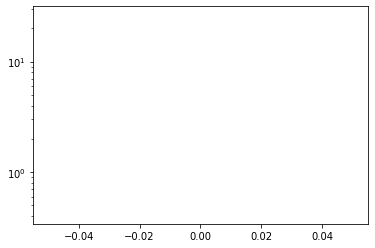

AE -> [Epoch: 0/200000][Batch: 0/196][Loss: 25.655532836914062][Accuracy: 0.41874998807907104]


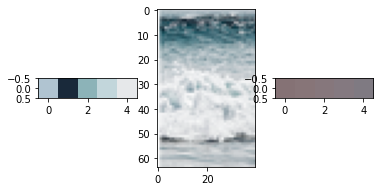

TEST --> [Epoch: 0/200000][Batch: 0/45][Loss: 0.29995471239089966][Accuracy: 1.0]


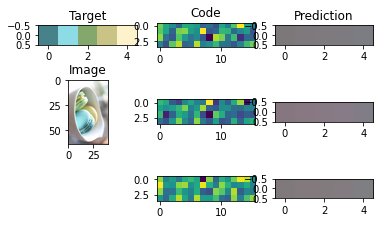

TEST --> [Epoch: 0/200000][Batch: 1/45][Loss: 0.3089301288127899][Accuracy: 0.6000000238418579]


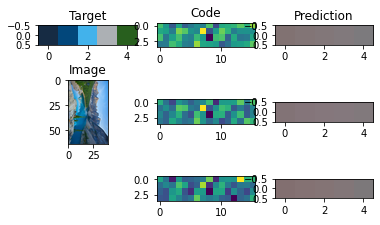

TEST --> [Epoch: 0/200000][Batch: 2/45][Loss: 0.3542290925979614][Accuracy: 0.4000000059604645]


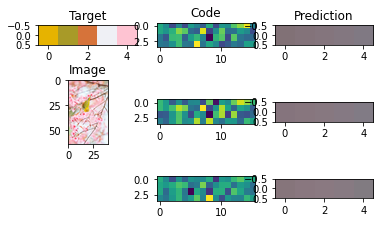

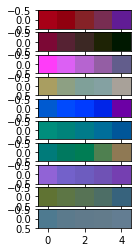

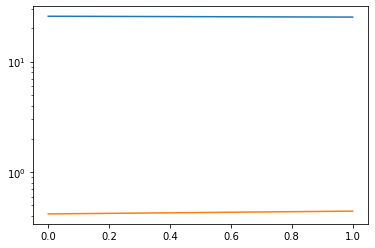

AE -> [Epoch: 0/200000][Batch: 1/196][Loss: 25.204723358154297][Accuracy: 0.4437499940395355]


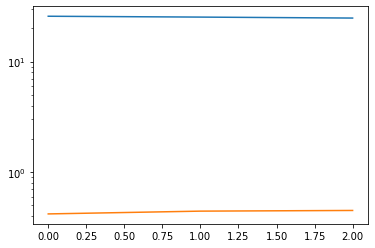

AE -> [Epoch: 0/200000][Batch: 2/196][Loss: 24.701982498168945][Accuracy: 0.44999998807907104]


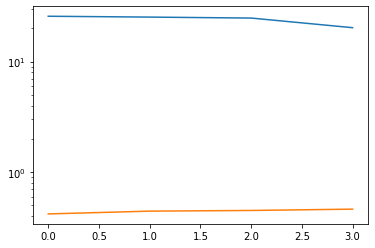

AE -> [Epoch: 0/200000][Batch: 3/196][Loss: 20.21946144104004][Accuracy: 0.4625000059604645]


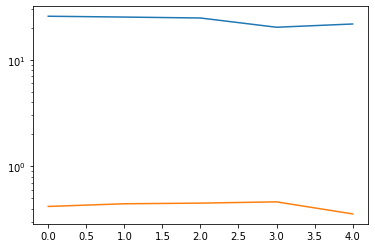

AE -> [Epoch: 0/200000][Batch: 4/196][Loss: 21.694114685058594][Accuracy: 0.35624998807907104]


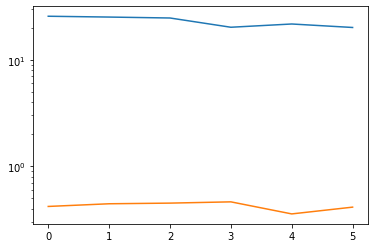

AE -> [Epoch: 0/200000][Batch: 5/196][Loss: 20.119731903076172][Accuracy: 0.4124999940395355]


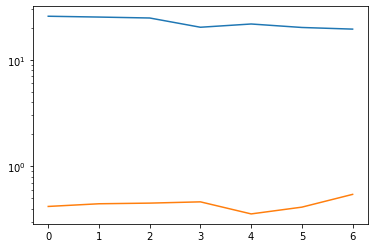

AE -> [Epoch: 0/200000][Batch: 6/196][Loss: 19.417911529541016][Accuracy: 0.543749988079071]


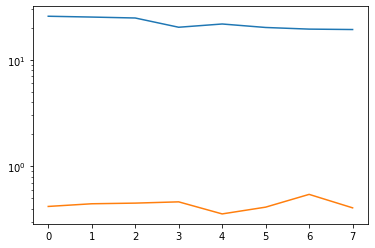

AE -> [Epoch: 0/200000][Batch: 7/196][Loss: 19.247339248657227][Accuracy: 0.40625]


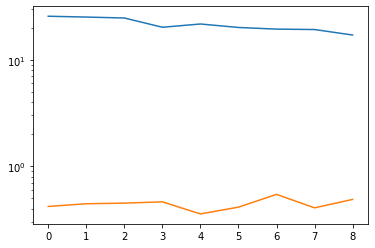

AE -> [Epoch: 0/200000][Batch: 8/196][Loss: 17.082448959350586][Accuracy: 0.48750001192092896]


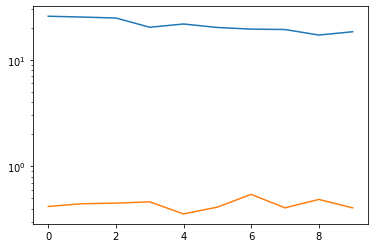

AE -> [Epoch: 0/200000][Batch: 9/196][Loss: 18.345672607421875][Accuracy: 0.40625]


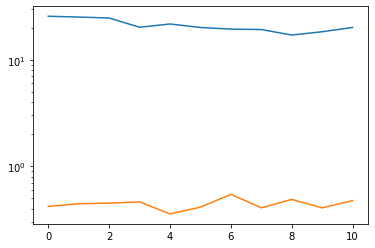

AE -> [Epoch: 0/200000][Batch: 10/196][Loss: 20.123544692993164][Accuracy: 0.4749999940395355]


/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


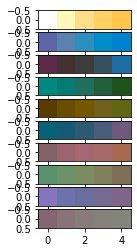

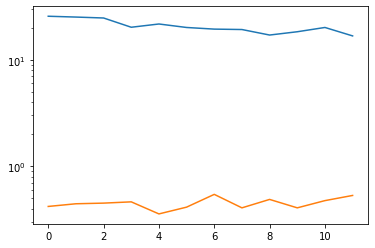

AE -> [Epoch: 0/200000][Batch: 11/196][Loss: 16.763809204101562][Accuracy: 0.53125]


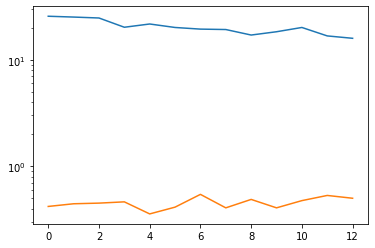

AE -> [Epoch: 0/200000][Batch: 12/196][Loss: 15.91990852355957][Accuracy: 0.5]


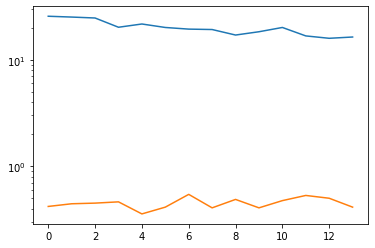

AE -> [Epoch: 0/200000][Batch: 13/196][Loss: 16.36835479736328][Accuracy: 0.4124999940395355]


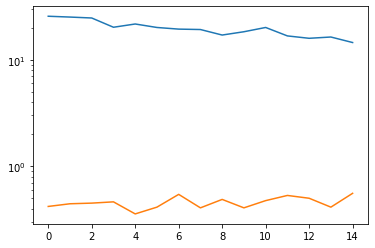

AE -> [Epoch: 0/200000][Batch: 14/196][Loss: 14.52663516998291][Accuracy: 0.5562499761581421]


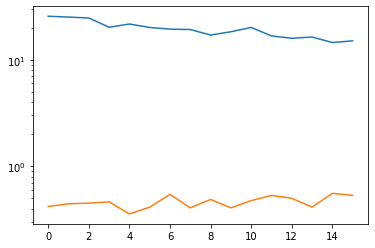

AE -> [Epoch: 0/200000][Batch: 15/196][Loss: 15.064766883850098][Accuracy: 0.53125]


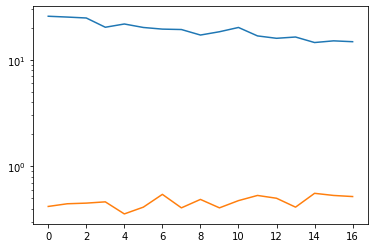

AE -> [Epoch: 0/200000][Batch: 16/196][Loss: 14.788372039794922][Accuracy: 0.518750011920929]


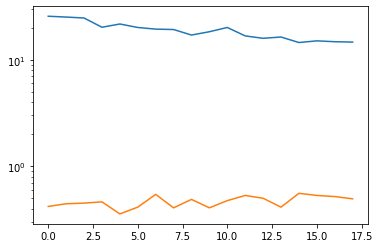

AE -> [Epoch: 0/200000][Batch: 17/196][Loss: 14.666526794433594][Accuracy: 0.4937500059604645]


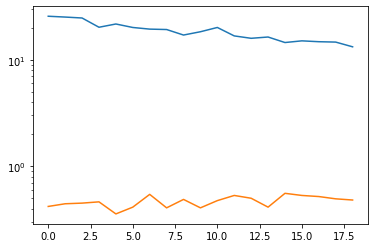

AE -> [Epoch: 0/200000][Batch: 18/196][Loss: 13.240875244140625][Accuracy: 0.48124998807907104]


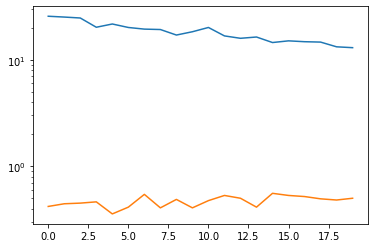

AE -> [Epoch: 0/200000][Batch: 19/196][Loss: 12.996896743774414][Accuracy: 0.5]


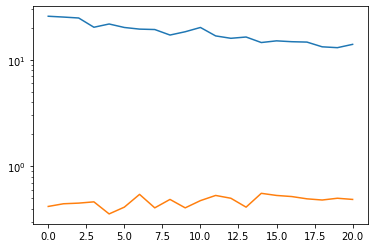

AE -> [Epoch: 0/200000][Batch: 20/196][Loss: 13.96327018737793][Accuracy: 0.48750001192092896]


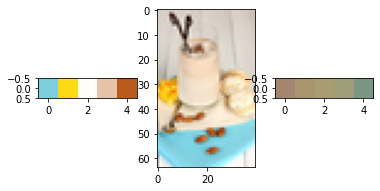

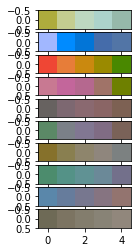

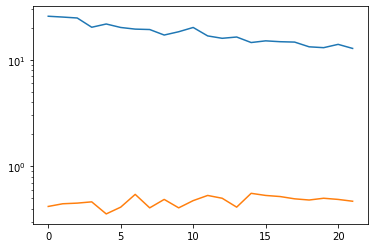

AE -> [Epoch: 0/200000][Batch: 21/196][Loss: 12.788580894470215][Accuracy: 0.46875]


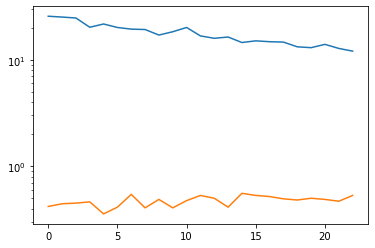

AE -> [Epoch: 0/200000][Batch: 22/196][Loss: 12.061686515808105][Accuracy: 0.53125]


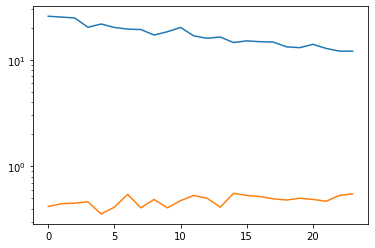

AE -> [Epoch: 0/200000][Batch: 23/196][Loss: 12.030890464782715][Accuracy: 0.550000011920929]


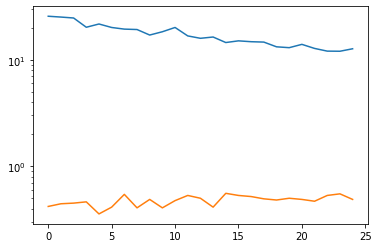

AE -> [Epoch: 0/200000][Batch: 24/196][Loss: 12.692325592041016][Accuracy: 0.48750001192092896]


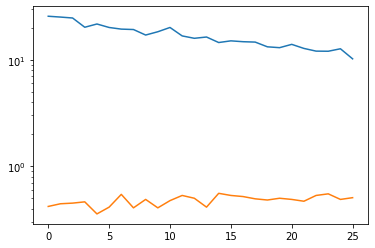

AE -> [Epoch: 0/200000][Batch: 25/196][Loss: 10.208257675170898][Accuracy: 0.5062500238418579]


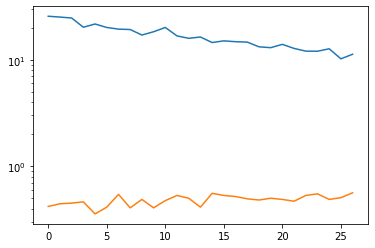

AE -> [Epoch: 0/200000][Batch: 26/196][Loss: 11.278477668762207][Accuracy: 0.5625]


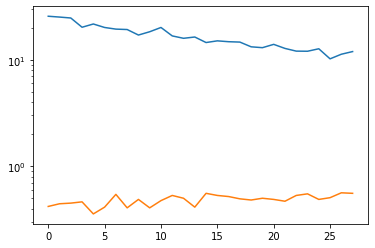

AE -> [Epoch: 0/200000][Batch: 27/196][Loss: 11.947410583496094][Accuracy: 0.5562499761581421]


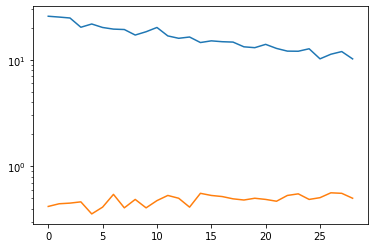

AE -> [Epoch: 0/200000][Batch: 28/196][Loss: 10.195432662963867][Accuracy: 0.5]


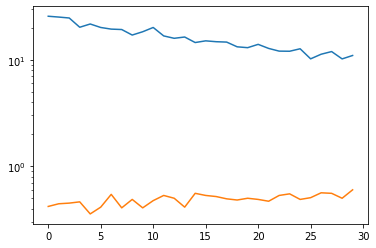

AE -> [Epoch: 0/200000][Batch: 29/196][Loss: 10.976419448852539][Accuracy: 0.6000000238418579]


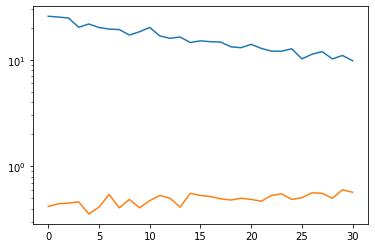

AE -> [Epoch: 0/200000][Batch: 30/196][Loss: 9.804776191711426][Accuracy: 0.5687500238418579]


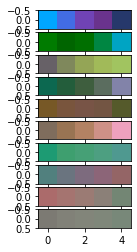

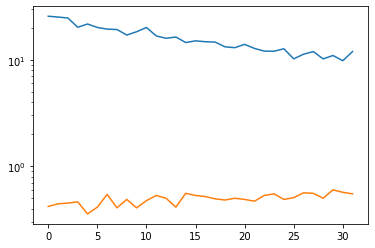

AE -> [Epoch: 0/200000][Batch: 31/196][Loss: 11.967551231384277][Accuracy: 0.550000011920929]


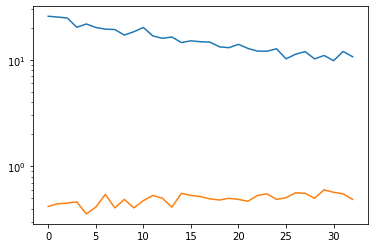

AE -> [Epoch: 0/200000][Batch: 32/196][Loss: 10.691526412963867][Accuracy: 0.48750001192092896]


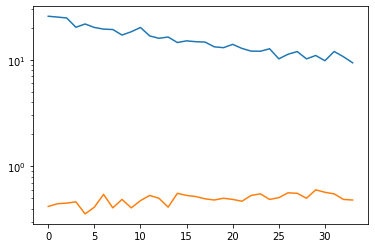

AE -> [Epoch: 0/200000][Batch: 33/196][Loss: 9.373579025268555][Accuracy: 0.48124998807907104]


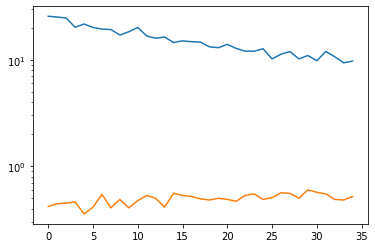

AE -> [Epoch: 0/200000][Batch: 34/196][Loss: 9.726858139038086][Accuracy: 0.518750011920929]


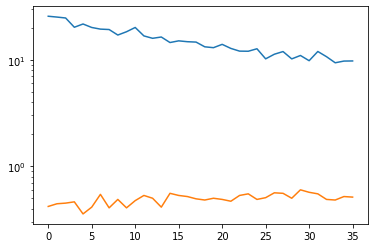

AE -> [Epoch: 0/200000][Batch: 35/196][Loss: 9.751180648803711][Accuracy: 0.512499988079071]


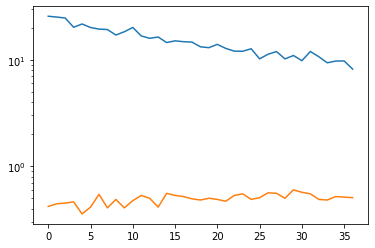

AE -> [Epoch: 0/200000][Batch: 36/196][Loss: 8.17855167388916][Accuracy: 0.5062500238418579]


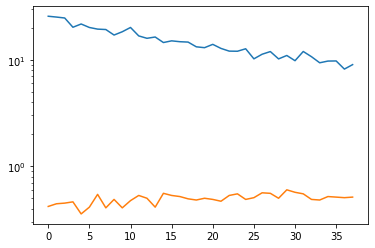

AE -> [Epoch: 0/200000][Batch: 37/196][Loss: 9.005830764770508][Accuracy: 0.512499988079071]


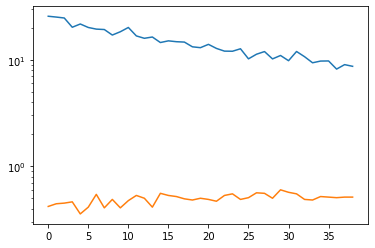

AE -> [Epoch: 0/200000][Batch: 38/196][Loss: 8.684033393859863][Accuracy: 0.512499988079071]


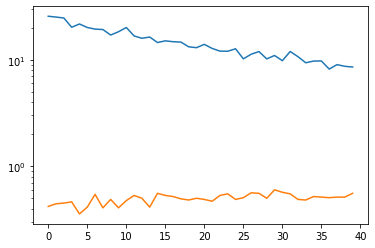

AE -> [Epoch: 0/200000][Batch: 39/196][Loss: 8.553007125854492][Accuracy: 0.5562499761581421]


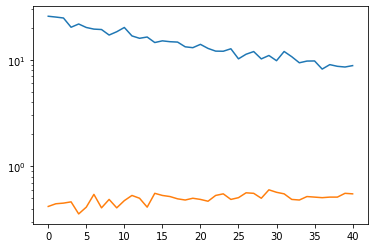

AE -> [Epoch: 0/200000][Batch: 40/196][Loss: 8.815752983093262][Accuracy: 0.550000011920929]


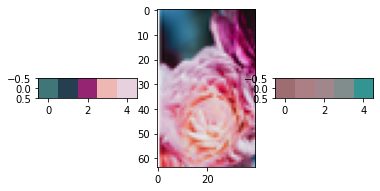

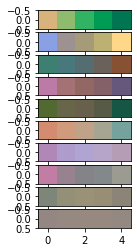

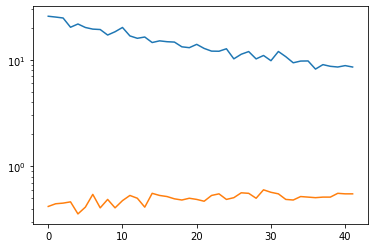

AE -> [Epoch: 0/200000][Batch: 41/196][Loss: 8.550743103027344][Accuracy: 0.550000011920929]


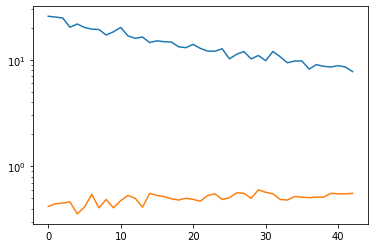

AE -> [Epoch: 0/200000][Batch: 42/196][Loss: 7.745570182800293][Accuracy: 0.5562499761581421]


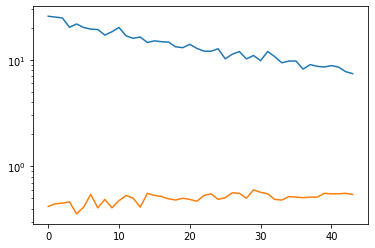

AE -> [Epoch: 0/200000][Batch: 43/196][Loss: 7.407956123352051][Accuracy: 0.543749988079071]


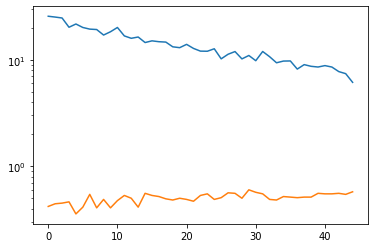

AE -> [Epoch: 0/200000][Batch: 44/196][Loss: 6.137077331542969][Accuracy: 0.574999988079071]


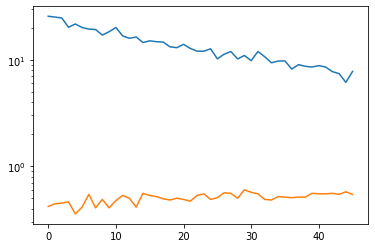

AE -> [Epoch: 0/200000][Batch: 45/196][Loss: 7.781763076782227][Accuracy: 0.543749988079071]


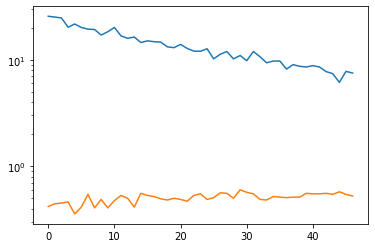

AE -> [Epoch: 0/200000][Batch: 46/196][Loss: 7.507023811340332][Accuracy: 0.5249999761581421]


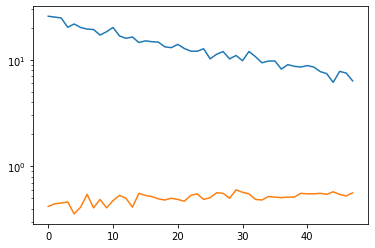

AE -> [Epoch: 0/200000][Batch: 47/196][Loss: 6.343842506408691][Accuracy: 0.5625]


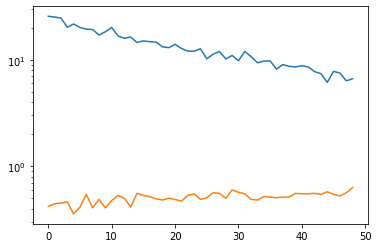

AE -> [Epoch: 0/200000][Batch: 48/196][Loss: 6.6378583908081055][Accuracy: 0.6312500238418579]


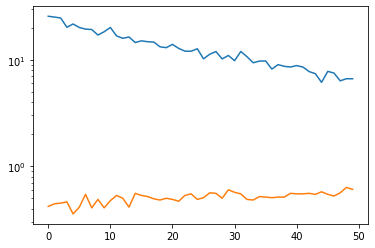

AE -> [Epoch: 0/200000][Batch: 49/196][Loss: 6.633597373962402][Accuracy: 0.606249988079071]


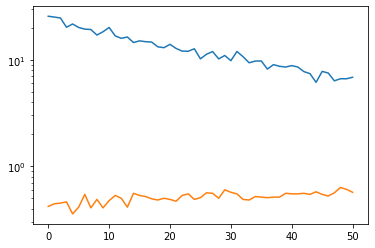

AE -> [Epoch: 0/200000][Batch: 50/196][Loss: 6.8524909019470215][Accuracy: 0.5687500238418579]


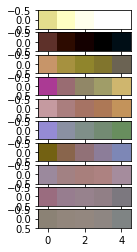

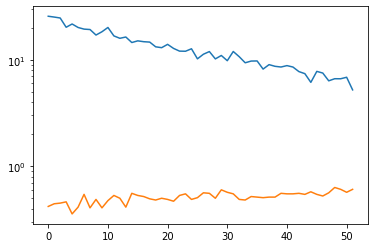

AE -> [Epoch: 0/200000][Batch: 51/196][Loss: 5.215080261230469][Accuracy: 0.606249988079071]


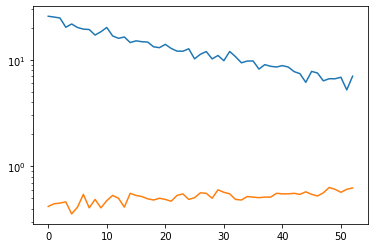

AE -> [Epoch: 0/200000][Batch: 52/196][Loss: 7.01157808303833][Accuracy: 0.625]


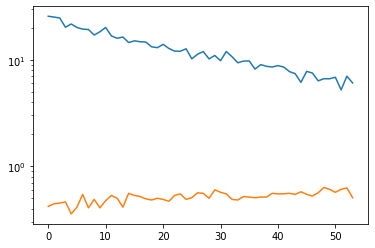

AE -> [Epoch: 0/200000][Batch: 53/196][Loss: 6.057521820068359][Accuracy: 0.5062500238418579]


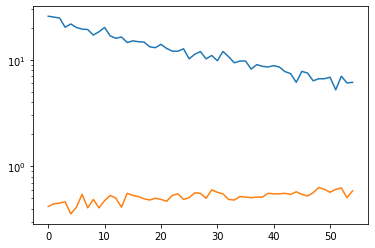

AE -> [Epoch: 0/200000][Batch: 54/196][Loss: 6.141246318817139][Accuracy: 0.5874999761581421]


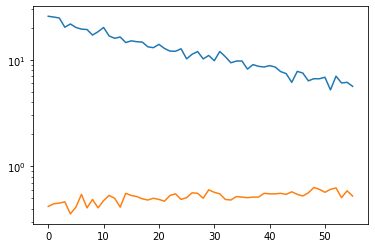

AE -> [Epoch: 0/200000][Batch: 55/196][Loss: 5.631534576416016][Accuracy: 0.5249999761581421]


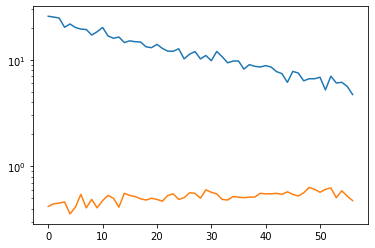

AE -> [Epoch: 0/200000][Batch: 56/196][Loss: 4.713898181915283][Accuracy: 0.4749999940395355]


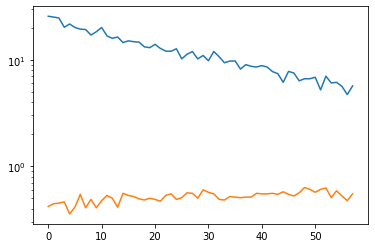

AE -> [Epoch: 0/200000][Batch: 57/196][Loss: 5.683411121368408][Accuracy: 0.550000011920929]


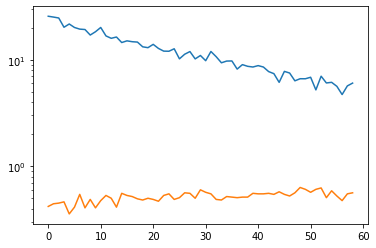

AE -> [Epoch: 0/200000][Batch: 58/196][Loss: 6.039585113525391][Accuracy: 0.5625]


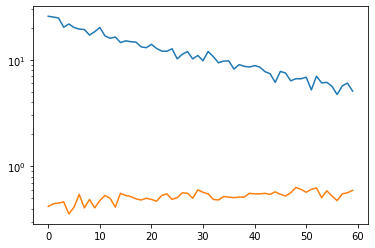

AE -> [Epoch: 0/200000][Batch: 59/196][Loss: 5.078552722930908][Accuracy: 0.59375]


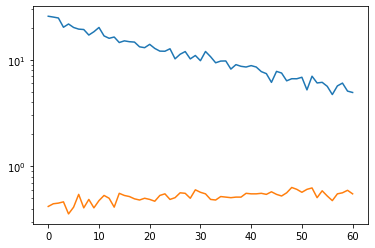

AE -> [Epoch: 0/200000][Batch: 60/196][Loss: 4.930928707122803][Accuracy: 0.550000011920929]


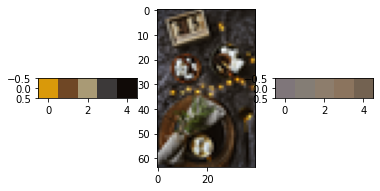

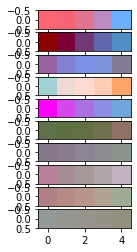

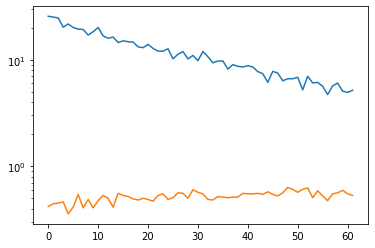

AE -> [Epoch: 0/200000][Batch: 61/196][Loss: 5.171443462371826][Accuracy: 0.53125]


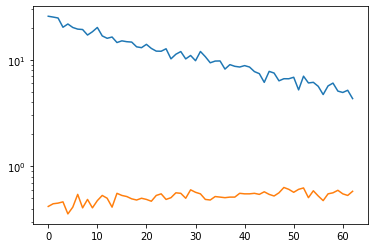

AE -> [Epoch: 0/200000][Batch: 62/196][Loss: 4.318089962005615][Accuracy: 0.581250011920929]


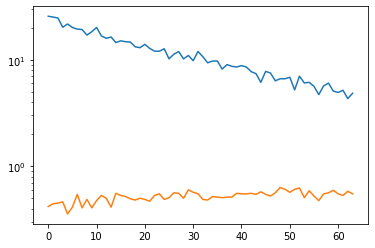

AE -> [Epoch: 0/200000][Batch: 63/196][Loss: 4.848655700683594][Accuracy: 0.550000011920929]


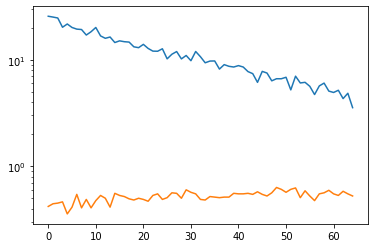

AE -> [Epoch: 0/200000][Batch: 64/196][Loss: 3.5497255325317383][Accuracy: 0.5249999761581421]


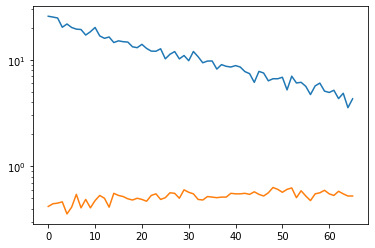

AE -> [Epoch: 0/200000][Batch: 65/196][Loss: 4.2992730140686035][Accuracy: 0.5249999761581421]


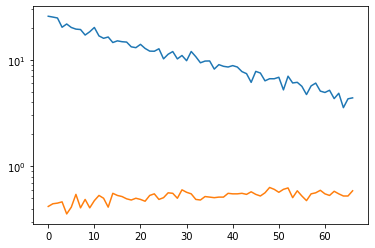

AE -> [Epoch: 0/200000][Batch: 66/196][Loss: 4.38770866394043][Accuracy: 0.5874999761581421]


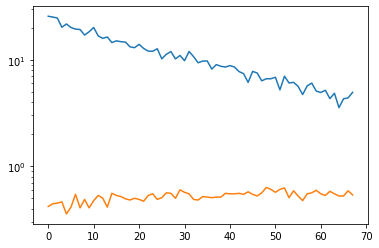

AE -> [Epoch: 0/200000][Batch: 67/196][Loss: 4.946125507354736][Accuracy: 0.5375000238418579]


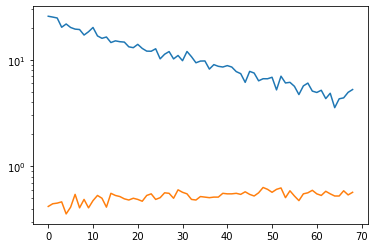

AE -> [Epoch: 0/200000][Batch: 68/196][Loss: 5.253646373748779][Accuracy: 0.5687500238418579]


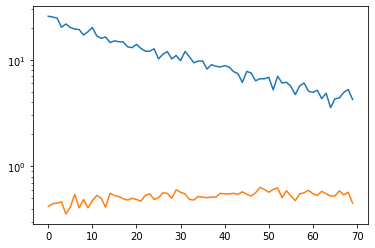

AE -> [Epoch: 0/200000][Batch: 69/196][Loss: 4.236382961273193][Accuracy: 0.44999998807907104]


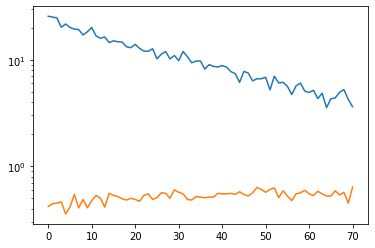

AE -> [Epoch: 0/200000][Batch: 70/196][Loss: 3.6204380989074707][Accuracy: 0.637499988079071]


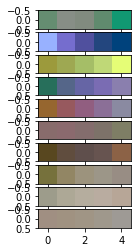

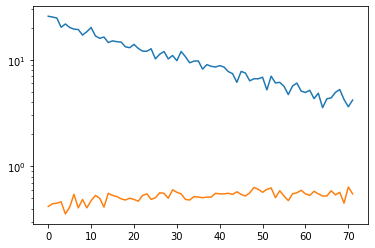

AE -> [Epoch: 0/200000][Batch: 71/196][Loss: 4.18403959274292][Accuracy: 0.550000011920929]


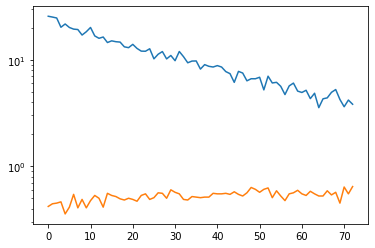

AE -> [Epoch: 0/200000][Batch: 72/196][Loss: 3.8212265968322754][Accuracy: 0.643750011920929]


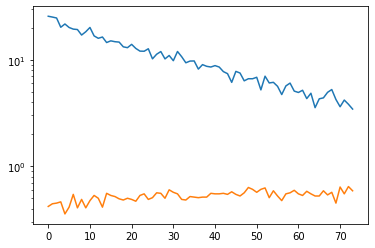

AE -> [Epoch: 0/200000][Batch: 73/196][Loss: 3.443147897720337][Accuracy: 0.5874999761581421]


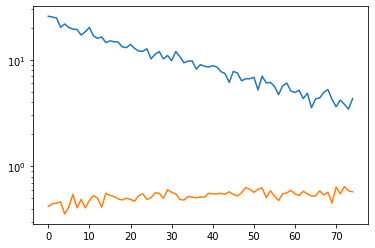

AE -> [Epoch: 0/200000][Batch: 74/196][Loss: 4.308924198150635][Accuracy: 0.574999988079071]


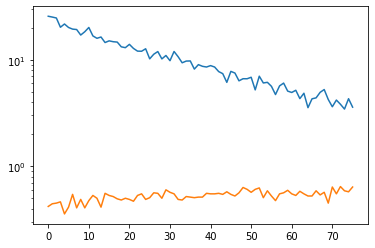

AE -> [Epoch: 0/200000][Batch: 75/196][Loss: 3.5886175632476807][Accuracy: 0.637499988079071]


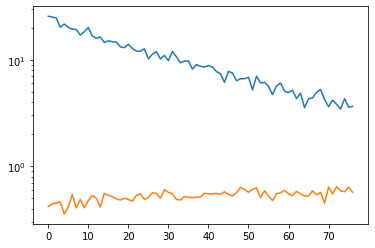

AE -> [Epoch: 0/200000][Batch: 76/196][Loss: 3.6461148262023926][Accuracy: 0.5687500238418579]


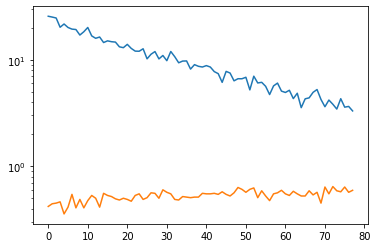

AE -> [Epoch: 0/200000][Batch: 77/196][Loss: 3.3076565265655518][Accuracy: 0.59375]


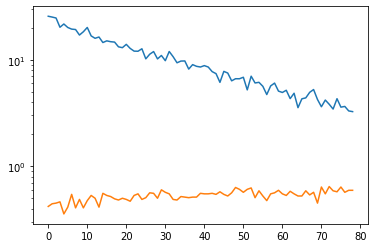

AE -> [Epoch: 0/200000][Batch: 78/196][Loss: 3.257573127746582][Accuracy: 0.59375]


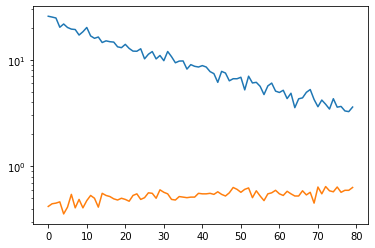

AE -> [Epoch: 0/200000][Batch: 79/196][Loss: 3.597623109817505][Accuracy: 0.6312500238418579]


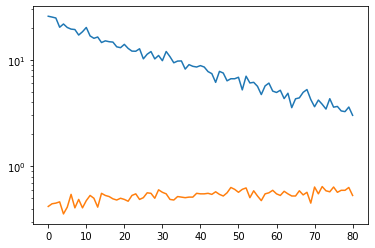

AE -> [Epoch: 0/200000][Batch: 80/196][Loss: 3.008241653442383][Accuracy: 0.53125]


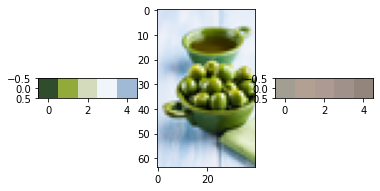

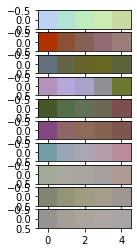

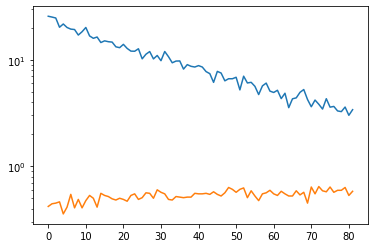

AE -> [Epoch: 0/200000][Batch: 81/196][Loss: 3.398164749145508][Accuracy: 0.581250011920929]


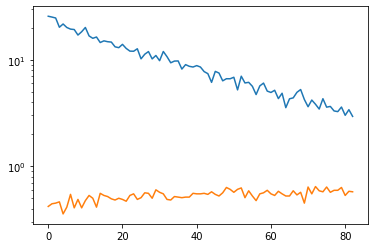

AE -> [Epoch: 0/200000][Batch: 82/196][Loss: 2.938718318939209][Accuracy: 0.574999988079071]


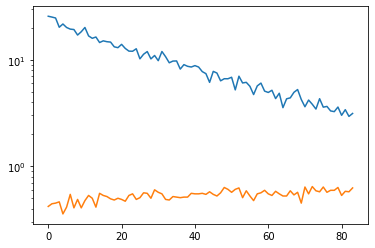

AE -> [Epoch: 0/200000][Batch: 83/196][Loss: 3.131558895111084][Accuracy: 0.625]


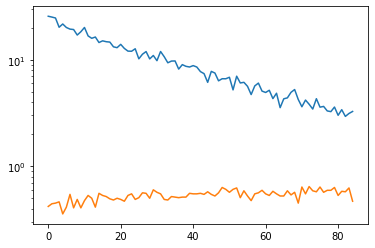

AE -> [Epoch: 0/200000][Batch: 84/196][Loss: 3.269996404647827][Accuracy: 0.46875]


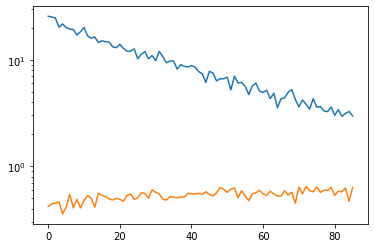

AE -> [Epoch: 0/200000][Batch: 85/196][Loss: 2.970761775970459][Accuracy: 0.6312500238418579]


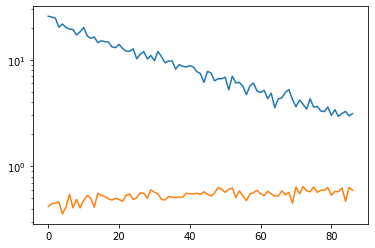

AE -> [Epoch: 0/200000][Batch: 86/196][Loss: 3.12373685836792][Accuracy: 0.59375]


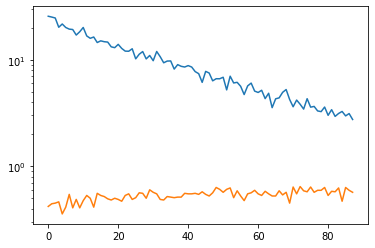

AE -> [Epoch: 0/200000][Batch: 87/196][Loss: 2.7484328746795654][Accuracy: 0.5687500238418579]


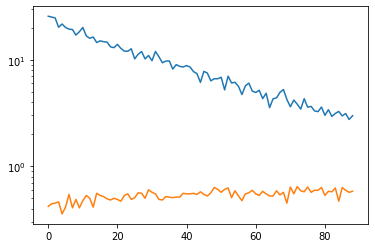

AE -> [Epoch: 0/200000][Batch: 88/196][Loss: 2.9834139347076416][Accuracy: 0.581250011920929]


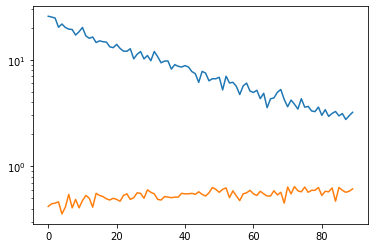

AE -> [Epoch: 0/200000][Batch: 89/196][Loss: 3.209167003631592][Accuracy: 0.612500011920929]


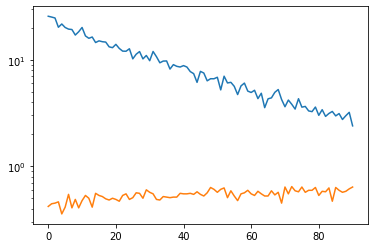

AE -> [Epoch: 0/200000][Batch: 90/196][Loss: 2.3945913314819336][Accuracy: 0.637499988079071]


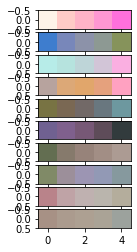

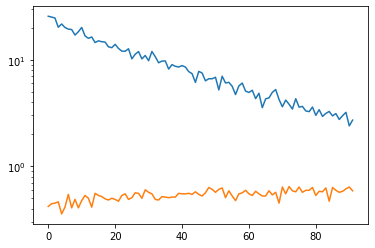

AE -> [Epoch: 0/200000][Batch: 91/196][Loss: 2.711766004562378][Accuracy: 0.5874999761581421]


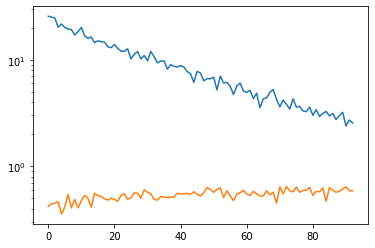

AE -> [Epoch: 0/200000][Batch: 92/196][Loss: 2.553079128265381][Accuracy: 0.5874999761581421]


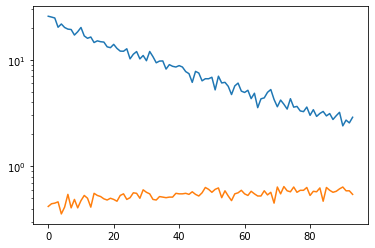

AE -> [Epoch: 0/200000][Batch: 93/196][Loss: 2.884049415588379][Accuracy: 0.543749988079071]


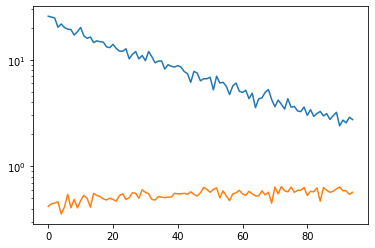

AE -> [Epoch: 0/200000][Batch: 94/196][Loss: 2.742527484893799][Accuracy: 0.5687500238418579]


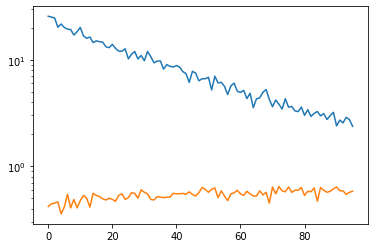

AE -> [Epoch: 0/200000][Batch: 95/196][Loss: 2.369778871536255][Accuracy: 0.581250011920929]


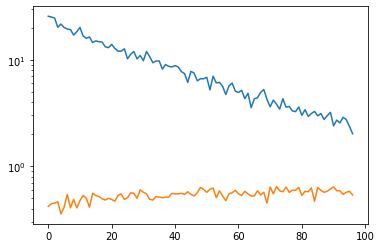

AE -> [Epoch: 0/200000][Batch: 96/196][Loss: 2.021635055541992][Accuracy: 0.5375000238418579]


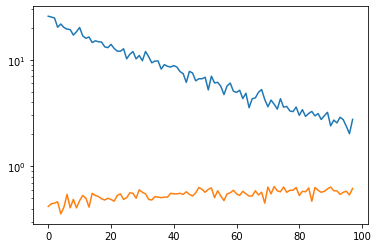

AE -> [Epoch: 0/200000][Batch: 97/196][Loss: 2.7548224925994873][Accuracy: 0.6187499761581421]


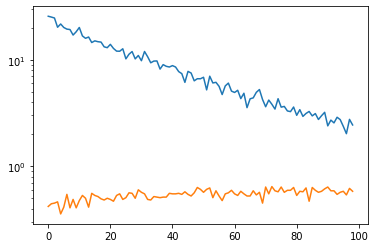

AE -> [Epoch: 0/200000][Batch: 98/196][Loss: 2.441422462463379][Accuracy: 0.581250011920929]


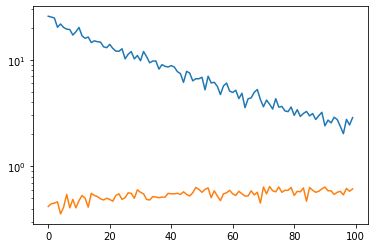

AE -> [Epoch: 0/200000][Batch: 99/196][Loss: 2.861356496810913][Accuracy: 0.612500011920929]


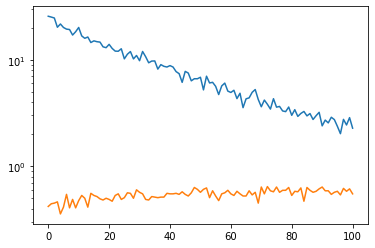

AE -> [Epoch: 0/200000][Batch: 100/196][Loss: 2.2783634662628174][Accuracy: 0.550000011920929]


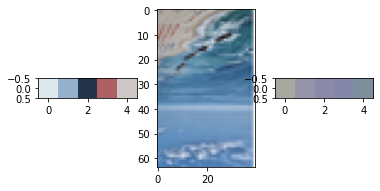

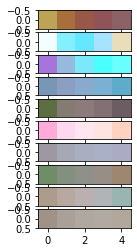

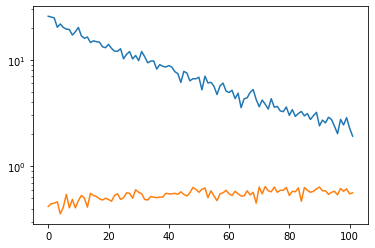

AE -> [Epoch: 0/200000][Batch: 101/196][Loss: 1.917887568473816][Accuracy: 0.5625]


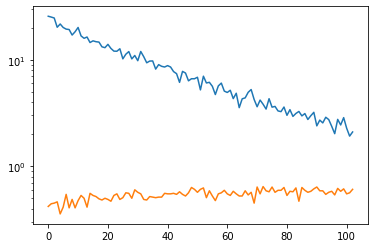

AE -> [Epoch: 0/200000][Batch: 102/196][Loss: 2.0977671146392822][Accuracy: 0.606249988079071]


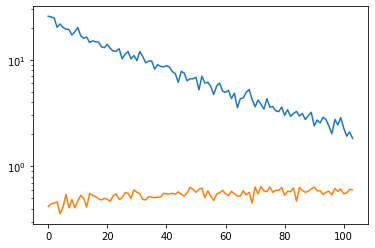

AE -> [Epoch: 0/200000][Batch: 103/196][Loss: 1.8241980075836182][Accuracy: 0.6000000238418579]


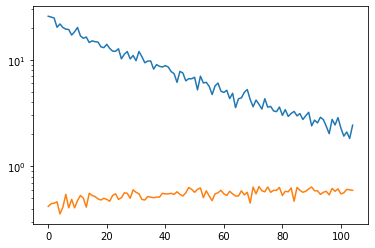

AE -> [Epoch: 0/200000][Batch: 104/196][Loss: 2.429442882537842][Accuracy: 0.59375]


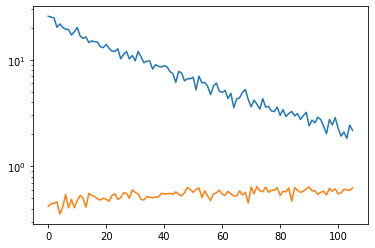

AE -> [Epoch: 0/200000][Batch: 105/196][Loss: 2.1701090335845947][Accuracy: 0.625]


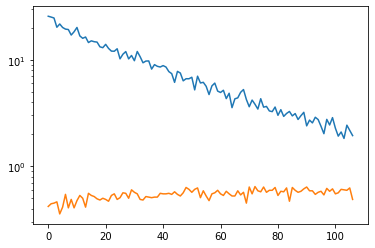

AE -> [Epoch: 0/200000][Batch: 106/196][Loss: 1.9394176006317139][Accuracy: 0.48750001192092896]


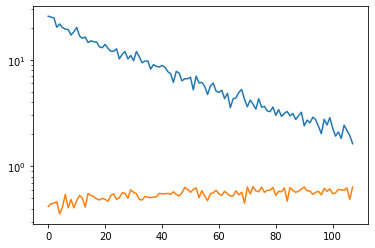

AE -> [Epoch: 0/200000][Batch: 107/196][Loss: 1.628005862236023][Accuracy: 0.637499988079071]


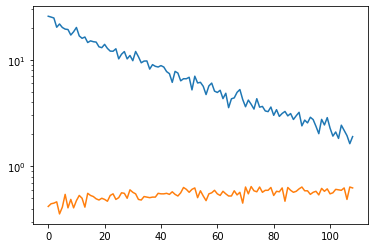

AE -> [Epoch: 0/200000][Batch: 108/196][Loss: 1.897670030593872][Accuracy: 0.625]


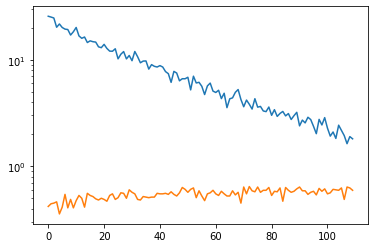

AE -> [Epoch: 0/200000][Batch: 109/196][Loss: 1.8084346055984497][Accuracy: 0.59375]


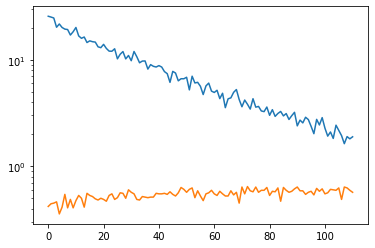

AE -> [Epoch: 0/200000][Batch: 110/196][Loss: 1.8897061347961426][Accuracy: 0.5687500238418579]


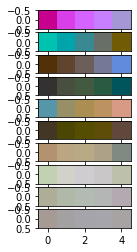

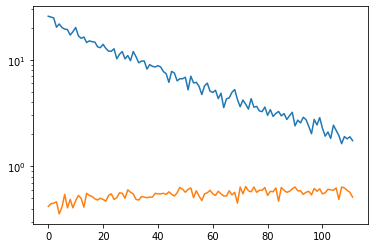

AE -> [Epoch: 0/200000][Batch: 111/196][Loss: 1.7394102811813354][Accuracy: 0.512499988079071]


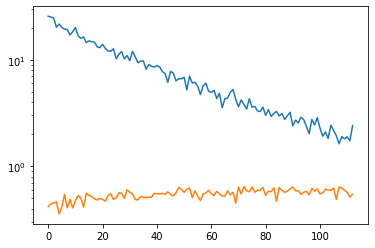

AE -> [Epoch: 0/200000][Batch: 112/196][Loss: 2.4099605083465576][Accuracy: 0.543749988079071]


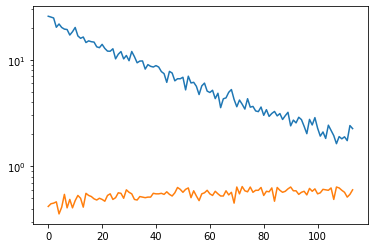

AE -> [Epoch: 0/200000][Batch: 113/196][Loss: 2.256216526031494][Accuracy: 0.6000000238418579]


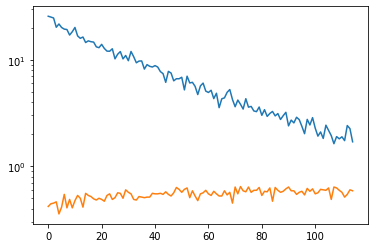

AE -> [Epoch: 0/200000][Batch: 114/196][Loss: 1.6960275173187256][Accuracy: 0.5874999761581421]


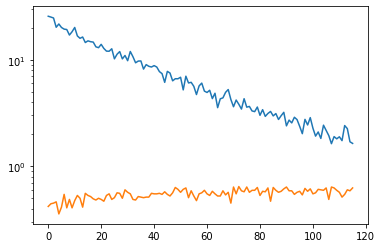

AE -> [Epoch: 0/200000][Batch: 115/196][Loss: 1.6379272937774658][Accuracy: 0.625]


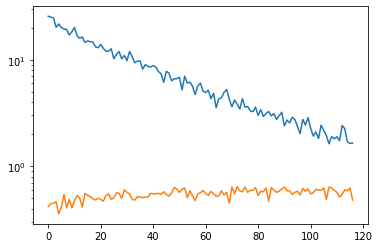

AE -> [Epoch: 0/200000][Batch: 116/196][Loss: 1.6459364891052246][Accuracy: 0.48124998807907104]


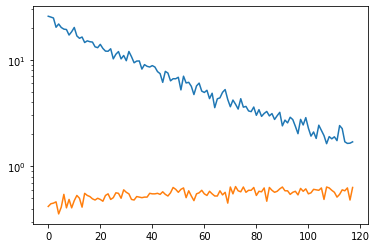

AE -> [Epoch: 0/200000][Batch: 117/196][Loss: 1.6944315433502197][Accuracy: 0.6312500238418579]


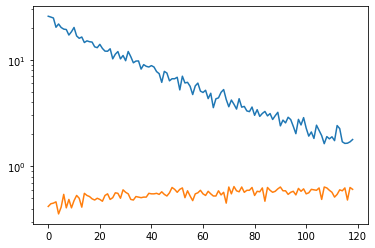

AE -> [Epoch: 0/200000][Batch: 118/196][Loss: 1.781243085861206][Accuracy: 0.606249988079071]


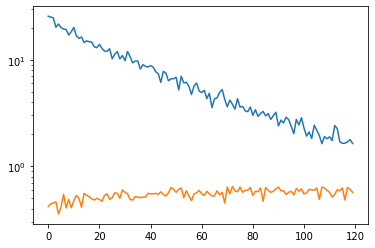

AE -> [Epoch: 0/200000][Batch: 119/196][Loss: 1.633604884147644][Accuracy: 0.5687500238418579]


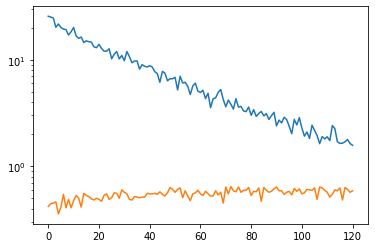

AE -> [Epoch: 0/200000][Batch: 120/196][Loss: 1.5703825950622559][Accuracy: 0.5874999761581421]


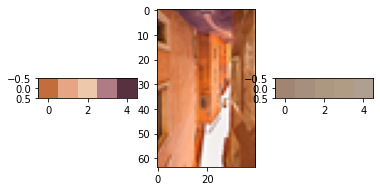

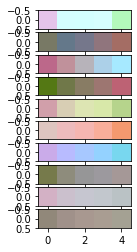

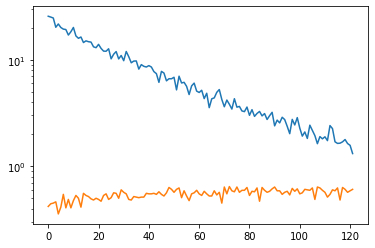

AE -> [Epoch: 0/200000][Batch: 121/196][Loss: 1.3148821592330933][Accuracy: 0.606249988079071]


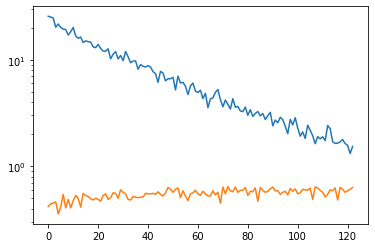

AE -> [Epoch: 0/200000][Batch: 122/196][Loss: 1.5323569774627686][Accuracy: 0.6312500238418579]


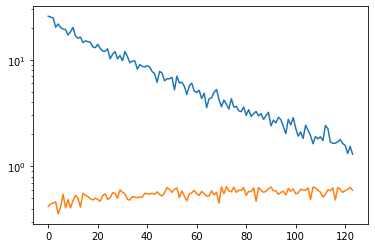

AE -> [Epoch: 0/200000][Batch: 123/196][Loss: 1.2971715927124023][Accuracy: 0.59375]


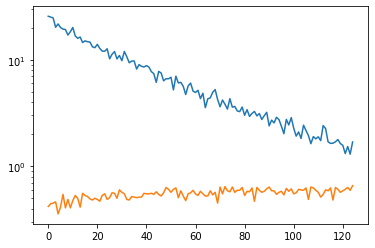

AE -> [Epoch: 0/200000][Batch: 124/196][Loss: 1.688843011856079][Accuracy: 0.65625]


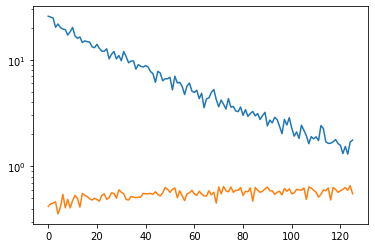

AE -> [Epoch: 0/200000][Batch: 125/196][Loss: 1.7582640647888184][Accuracy: 0.550000011920929]


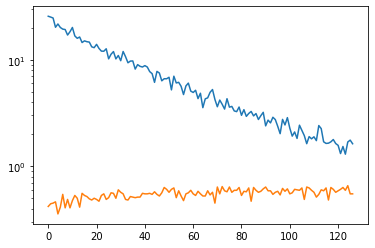

AE -> [Epoch: 0/200000][Batch: 126/196][Loss: 1.6257396936416626][Accuracy: 0.550000011920929]


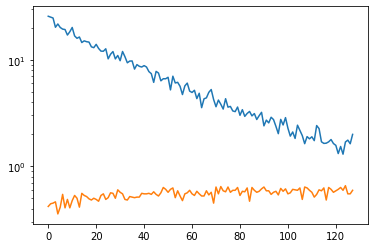

AE -> [Epoch: 0/200000][Batch: 127/196][Loss: 1.9905879497528076][Accuracy: 0.59375]


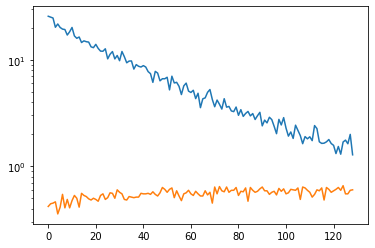

AE -> [Epoch: 0/200000][Batch: 128/196][Loss: 1.2800676822662354][Accuracy: 0.6000000238418579]


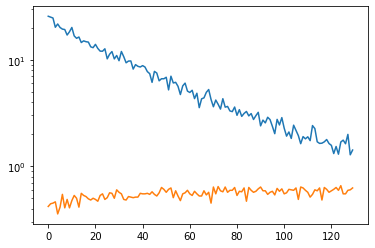

AE -> [Epoch: 0/200000][Batch: 129/196][Loss: 1.418729305267334][Accuracy: 0.625]


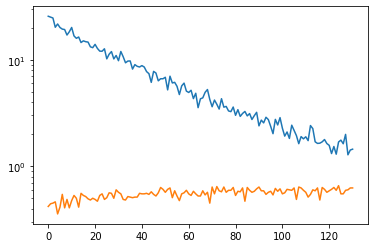

AE -> [Epoch: 0/200000][Batch: 130/196][Loss: 1.4459842443466187][Accuracy: 0.625]


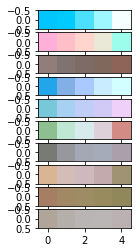

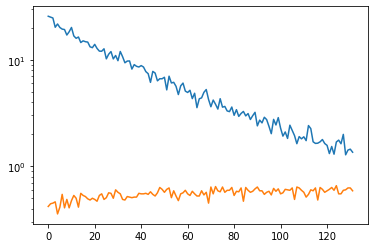

AE -> [Epoch: 0/200000][Batch: 131/196][Loss: 1.3535709381103516][Accuracy: 0.5874999761581421]


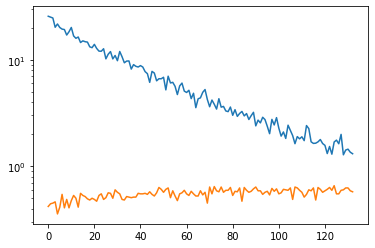

AE -> [Epoch: 0/200000][Batch: 132/196][Loss: 1.3097933530807495][Accuracy: 0.574999988079071]


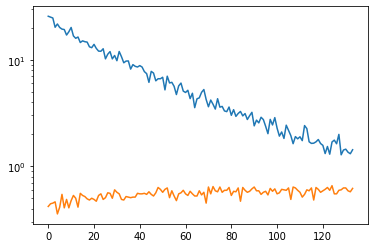

AE -> [Epoch: 0/200000][Batch: 133/196][Loss: 1.4280260801315308][Accuracy: 0.6187499761581421]


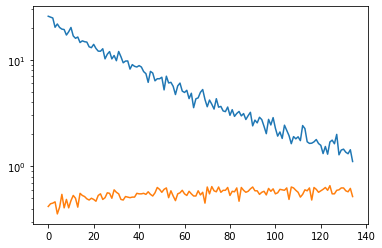

AE -> [Epoch: 0/200000][Batch: 134/196][Loss: 1.1074317693710327][Accuracy: 0.518750011920929]


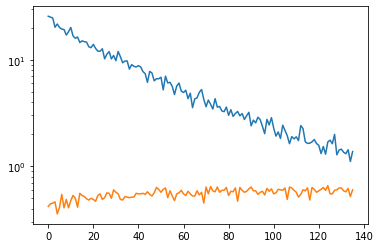

AE -> [Epoch: 0/200000][Batch: 135/196][Loss: 1.3723019361495972][Accuracy: 0.6000000238418579]


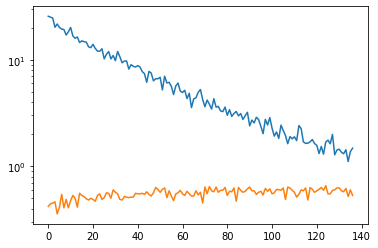

AE -> [Epoch: 0/200000][Batch: 136/196][Loss: 1.477311372756958][Accuracy: 0.53125]


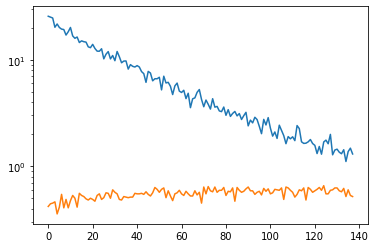

AE -> [Epoch: 0/200000][Batch: 137/196][Loss: 1.3034249544143677][Accuracy: 0.518750011920929]


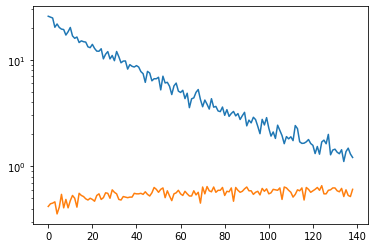

AE -> [Epoch: 0/200000][Batch: 138/196][Loss: 1.2083739042282104][Accuracy: 0.606249988079071]


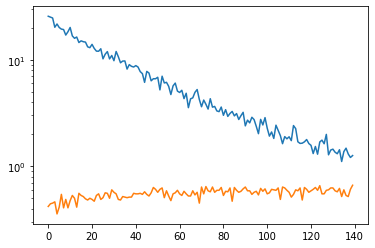

AE -> [Epoch: 0/200000][Batch: 139/196][Loss: 1.2590649127960205][Accuracy: 0.6625000238418579]


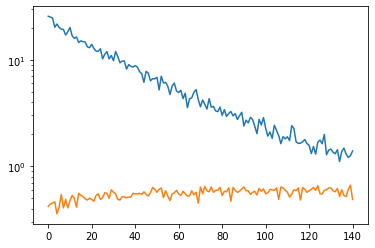

AE -> [Epoch: 0/200000][Batch: 140/196][Loss: 1.391089916229248][Accuracy: 0.48750001192092896]


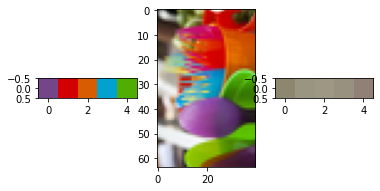

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


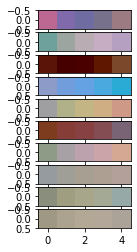

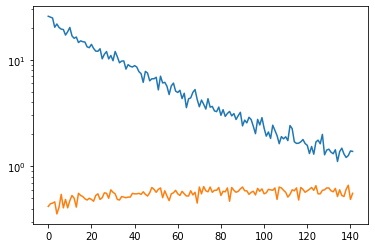

AE -> [Epoch: 0/200000][Batch: 141/196][Loss: 1.3776803016662598][Accuracy: 0.5562499761581421]


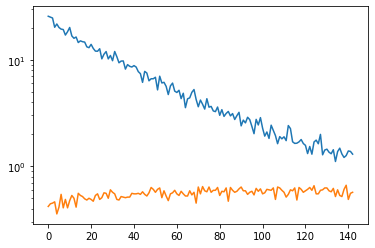

AE -> [Epoch: 0/200000][Batch: 142/196][Loss: 1.2984658479690552][Accuracy: 0.5687500238418579]


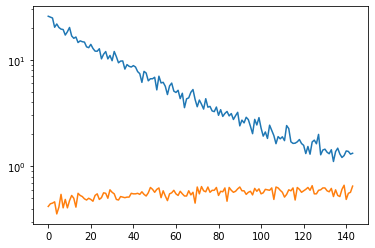

AE -> [Epoch: 0/200000][Batch: 143/196][Loss: 1.323592185974121][Accuracy: 0.6499999761581421]


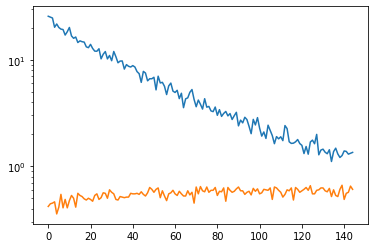

AE -> [Epoch: 0/200000][Batch: 144/196][Loss: 1.348323106765747][Accuracy: 0.606249988079071]


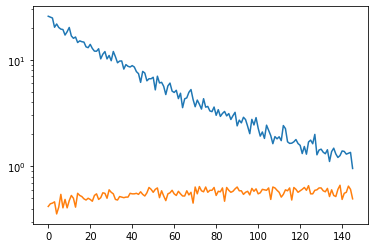

AE -> [Epoch: 0/200000][Batch: 145/196][Loss: 0.9525464773178101][Accuracy: 0.4937500059604645]


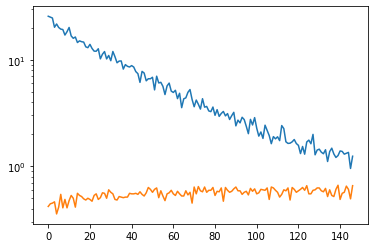

AE -> [Epoch: 0/200000][Batch: 146/196][Loss: 1.2409535646438599][Accuracy: 0.65625]


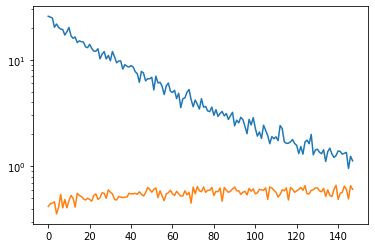

AE -> [Epoch: 0/200000][Batch: 147/196][Loss: 1.1227887868881226][Accuracy: 0.606249988079071]


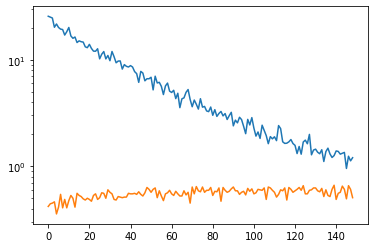

AE -> [Epoch: 0/200000][Batch: 148/196][Loss: 1.202056646347046][Accuracy: 0.5062500238418579]


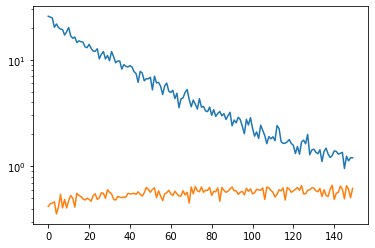

AE -> [Epoch: 0/200000][Batch: 149/196][Loss: 1.199347972869873][Accuracy: 0.6187499761581421]


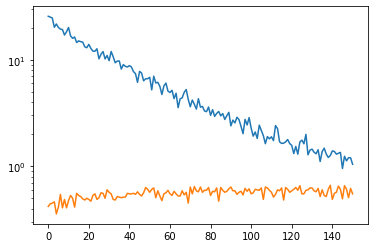

AE -> [Epoch: 0/200000][Batch: 150/196][Loss: 1.0428699254989624][Accuracy: 0.550000011920929]


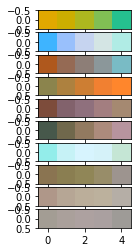

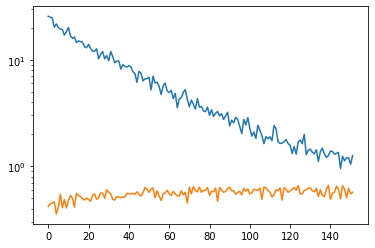

AE -> [Epoch: 0/200000][Batch: 151/196][Loss: 1.2570494413375854][Accuracy: 0.5687500238418579]


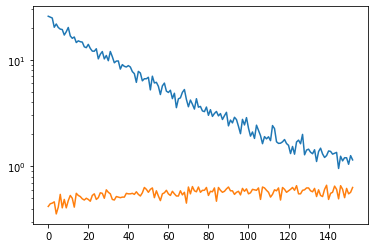

AE -> [Epoch: 0/200000][Batch: 152/196][Loss: 1.1462929248809814][Accuracy: 0.6312500238418579]


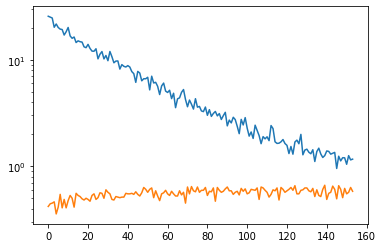

AE -> [Epoch: 0/200000][Batch: 153/196][Loss: 1.1652761697769165][Accuracy: 0.581250011920929]


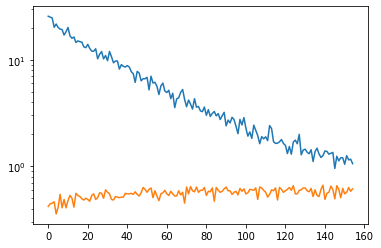

AE -> [Epoch: 0/200000][Batch: 154/196][Loss: 1.0572614669799805][Accuracy: 0.612500011920929]


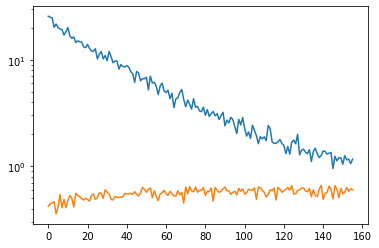

AE -> [Epoch: 0/200000][Batch: 155/196][Loss: 1.1668320894241333][Accuracy: 0.6000000238418579]


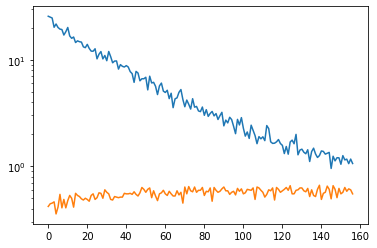

AE -> [Epoch: 0/200000][Batch: 156/196][Loss: 1.0604941844940186][Accuracy: 0.550000011920929]


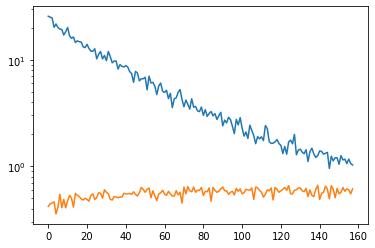

AE -> [Epoch: 0/200000][Batch: 157/196][Loss: 1.0266374349594116][Accuracy: 0.612500011920929]


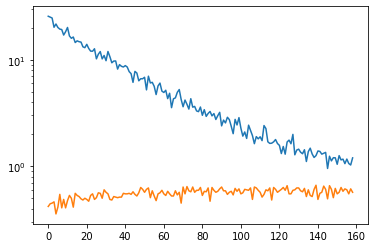

AE -> [Epoch: 0/200000][Batch: 158/196][Loss: 1.1973127126693726][Accuracy: 0.5687500238418579]


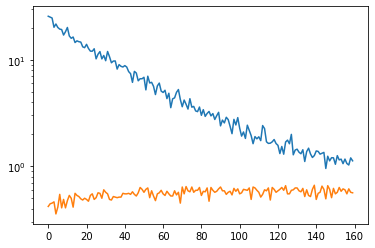

AE -> [Epoch: 0/200000][Batch: 159/196][Loss: 1.1238192319869995][Accuracy: 0.5625]


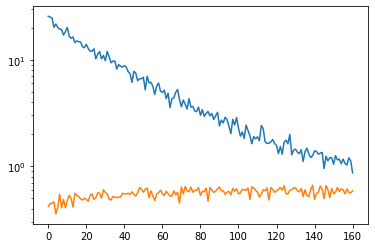

AE -> [Epoch: 0/200000][Batch: 160/196][Loss: 0.8658474087715149][Accuracy: 0.5874999761581421]


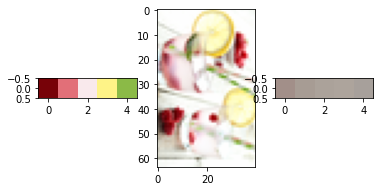

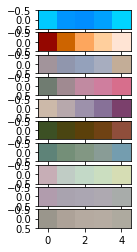

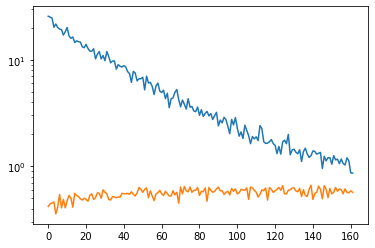

AE -> [Epoch: 0/200000][Batch: 161/196][Loss: 0.8618515133857727][Accuracy: 0.5687500238418579]


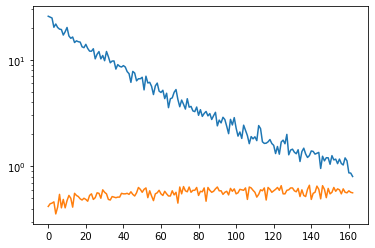

AE -> [Epoch: 0/200000][Batch: 162/196][Loss: 0.8006032705307007][Accuracy: 0.5625]


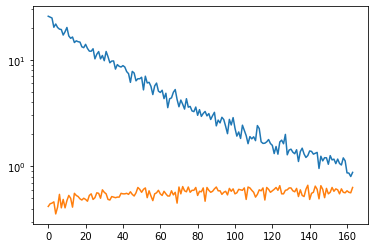

AE -> [Epoch: 0/200000][Batch: 163/196][Loss: 0.8750768899917603][Accuracy: 0.6312500238418579]


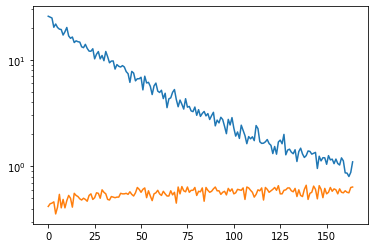

AE -> [Epoch: 0/200000][Batch: 164/196][Loss: 1.098726749420166][Accuracy: 0.637499988079071]


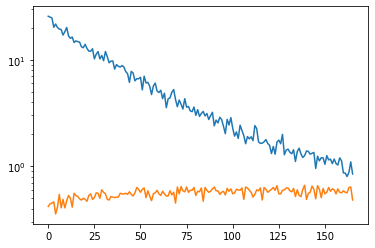

AE -> [Epoch: 0/200000][Batch: 165/196][Loss: 0.8450091481208801][Accuracy: 0.48124998807907104]


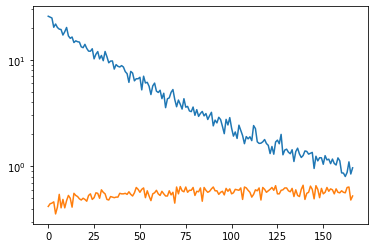

AE -> [Epoch: 0/200000][Batch: 166/196][Loss: 0.9656372666358948][Accuracy: 0.5249999761581421]


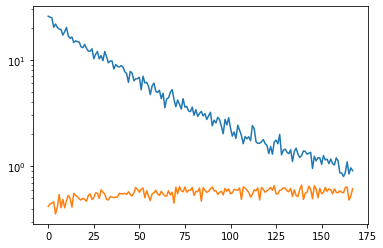

AE -> [Epoch: 0/200000][Batch: 167/196][Loss: 0.9071959257125854][Accuracy: 0.612500011920929]


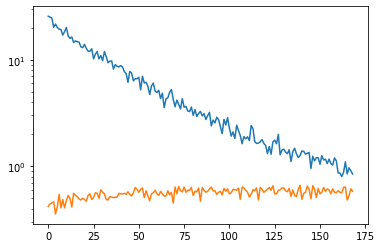

AE -> [Epoch: 0/200000][Batch: 168/196][Loss: 0.8444908857345581][Accuracy: 0.581250011920929]


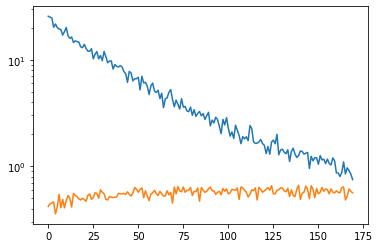

AE -> [Epoch: 0/200000][Batch: 169/196][Loss: 0.7501670718193054][Accuracy: 0.5625]


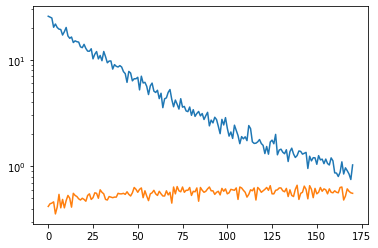

AE -> [Epoch: 0/200000][Batch: 170/196][Loss: 1.0281237363815308][Accuracy: 0.5562499761581421]


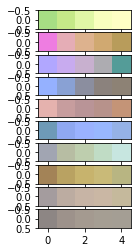

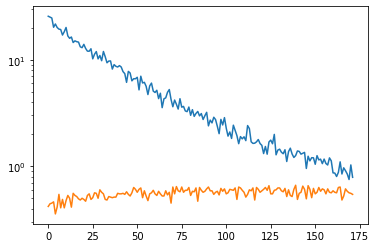

AE -> [Epoch: 0/200000][Batch: 171/196][Loss: 0.7865707278251648][Accuracy: 0.543749988079071]


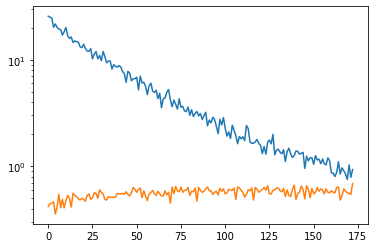

AE -> [Epoch: 0/200000][Batch: 172/196][Loss: 0.9305613040924072][Accuracy: 0.6875]


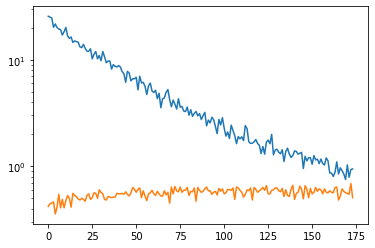

AE -> [Epoch: 0/200000][Batch: 173/196][Loss: 0.9426215291023254][Accuracy: 0.5062500238418579]


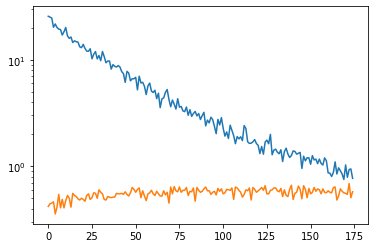

AE -> [Epoch: 0/200000][Batch: 174/196][Loss: 0.769072413444519][Accuracy: 0.574999988079071]


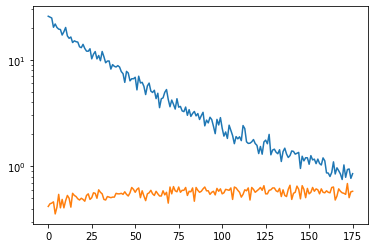

AE -> [Epoch: 0/200000][Batch: 175/196][Loss: 0.8511401414871216][Accuracy: 0.581250011920929]


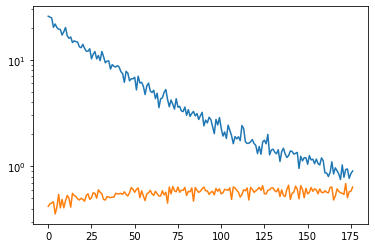

AE -> [Epoch: 0/200000][Batch: 176/196][Loss: 0.9021517634391785][Accuracy: 0.637499988079071]


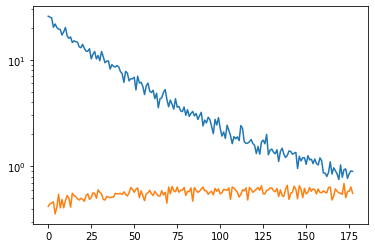

AE -> [Epoch: 0/200000][Batch: 177/196][Loss: 0.8936485052108765][Accuracy: 0.5562499761581421]


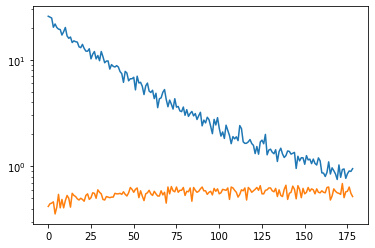

AE -> [Epoch: 0/200000][Batch: 178/196][Loss: 0.948278546333313][Accuracy: 0.518750011920929]


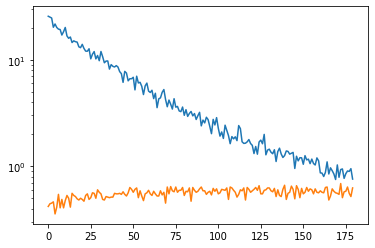

AE -> [Epoch: 0/200000][Batch: 179/196][Loss: 0.7570607662200928][Accuracy: 0.625]


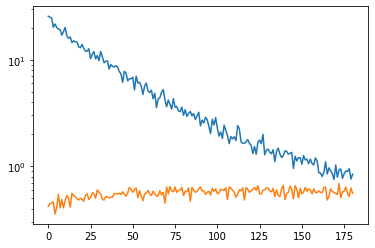

AE -> [Epoch: 0/200000][Batch: 180/196][Loss: 0.8417463898658752][Accuracy: 0.5562499761581421]


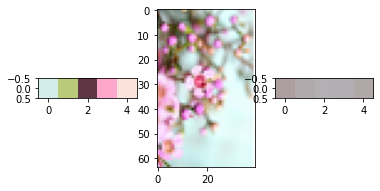

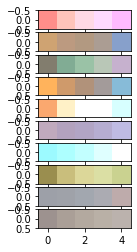

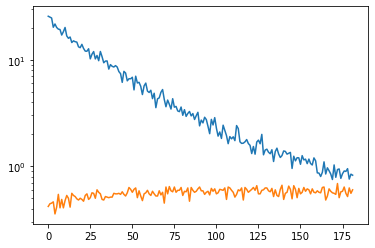

AE -> [Epoch: 0/200000][Batch: 181/196][Loss: 0.8231266140937805][Accuracy: 0.6000000238418579]


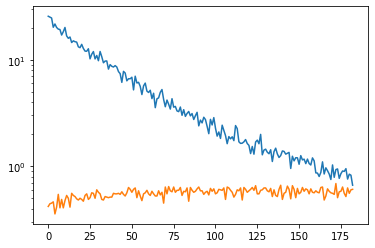

AE -> [Epoch: 0/200000][Batch: 182/196][Loss: 0.6632696390151978][Accuracy: 0.606249988079071]


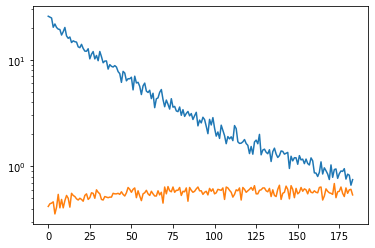

AE -> [Epoch: 0/200000][Batch: 183/196][Loss: 0.7481237649917603][Accuracy: 0.5375000238418579]


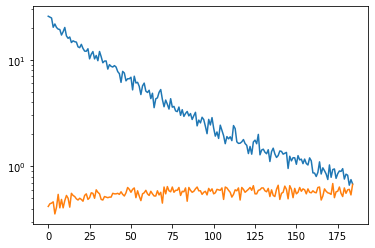

AE -> [Epoch: 0/200000][Batch: 184/196][Loss: 0.6807734966278076][Accuracy: 0.675000011920929]


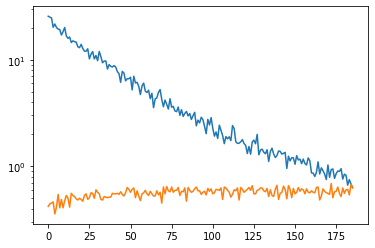

AE -> [Epoch: 0/200000][Batch: 185/196][Loss: 0.6332247257232666][Accuracy: 0.625]


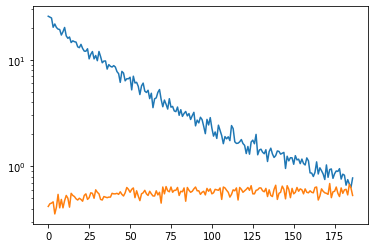

AE -> [Epoch: 0/200000][Batch: 186/196][Loss: 0.7751721739768982][Accuracy: 0.53125]


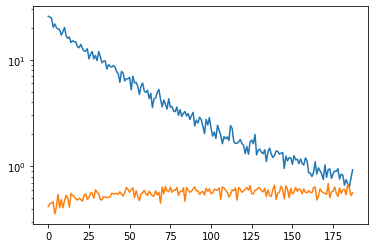

AE -> [Epoch: 0/200000][Batch: 187/196][Loss: 0.9239801168441772][Accuracy: 0.5625]


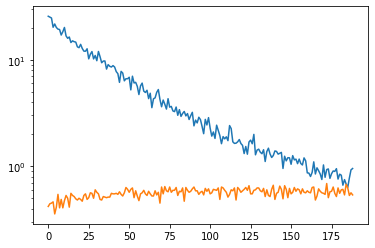

AE -> [Epoch: 0/200000][Batch: 188/196][Loss: 0.9515606164932251][Accuracy: 0.5375000238418579]


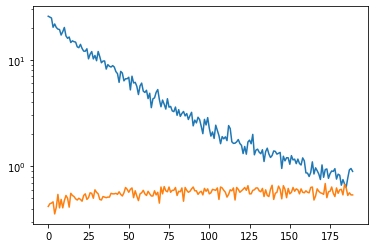

AE -> [Epoch: 0/200000][Batch: 189/196][Loss: 0.8941568732261658][Accuracy: 0.5375000238418579]


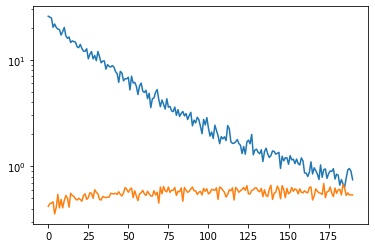

AE -> [Epoch: 0/200000][Batch: 190/196][Loss: 0.7456905245780945][Accuracy: 0.5375000238418579]


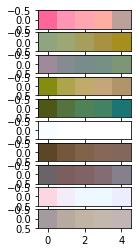

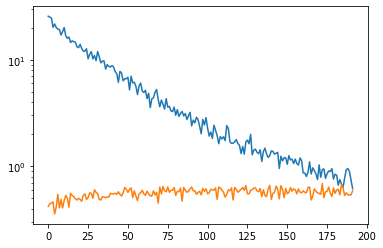

AE -> [Epoch: 0/200000][Batch: 191/196][Loss: 0.6161323189735413][Accuracy: 0.5874999761581421]


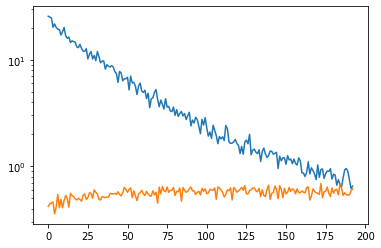

AE -> [Epoch: 0/200000][Batch: 192/196][Loss: 0.6497355699539185][Accuracy: 0.612500011920929]


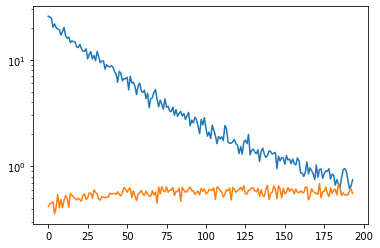

AE -> [Epoch: 0/200000][Batch: 193/196][Loss: 0.7451226115226746][Accuracy: 0.5562499761581421]


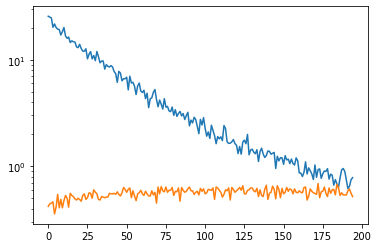

AE -> [Epoch: 0/200000][Batch: 194/196][Loss: 0.7805438041687012][Accuracy: 0.518750011920929]


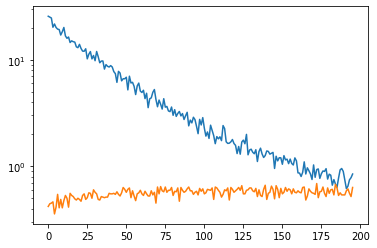

AE -> [Epoch: 0/200000][Batch: 195/196][Loss: 0.8442848920822144][Accuracy: 0.6312500238418579]


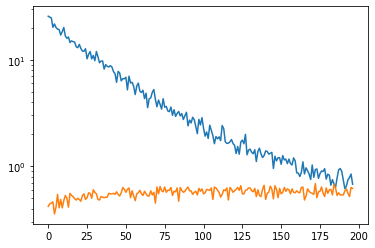

AE -> [Epoch: 1/200000][Batch: 0/196][Loss: 0.6778775453567505][Accuracy: 0.6187499761581421]


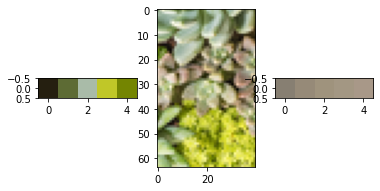

TEST --> [Epoch: 1/200000][Batch: 0/45][Loss: 0.9976715445518494][Accuracy: 0.6000000238418579]


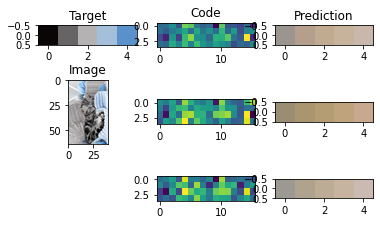

TEST --> [Epoch: 1/200000][Batch: 1/45][Loss: 0.8112310767173767][Accuracy: 0.20000000298023224]


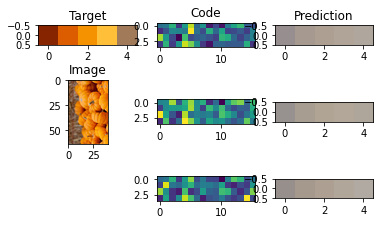

TEST --> [Epoch: 1/200000][Batch: 2/45][Loss: 0.9846712350845337][Accuracy: 0.800000011920929]


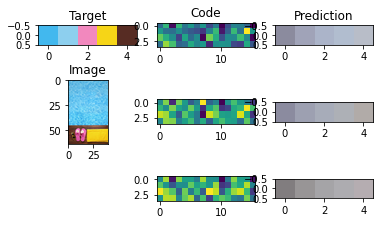

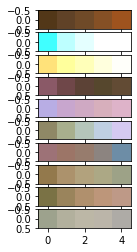

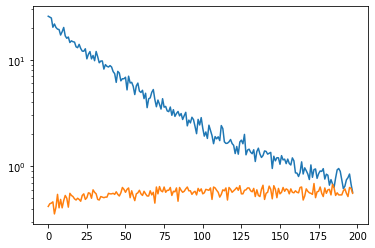

AE -> [Epoch: 1/200000][Batch: 1/196][Loss: 0.5698187947273254][Accuracy: 0.5562499761581421]


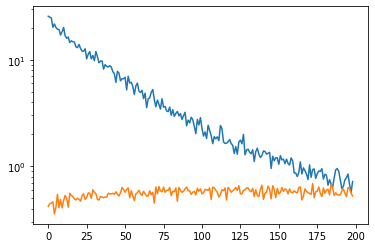

AE -> [Epoch: 1/200000][Batch: 2/196][Loss: 0.7182066440582275][Accuracy: 0.5249999761581421]


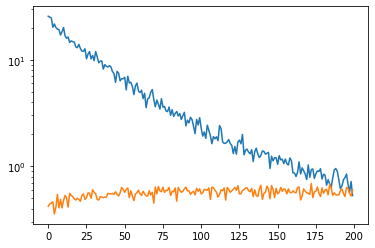

AE -> [Epoch: 1/200000][Batch: 3/196][Loss: 0.5299732685089111][Accuracy: 0.6000000238418579]


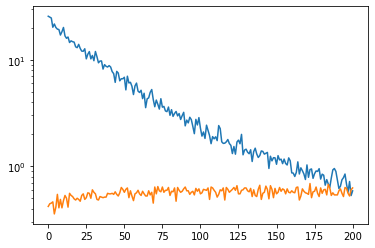

AE -> [Epoch: 1/200000][Batch: 4/196][Loss: 0.5863706469535828][Accuracy: 0.625]


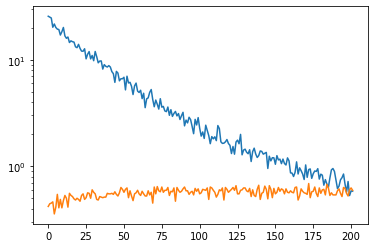

AE -> [Epoch: 1/200000][Batch: 5/196][Loss: 0.5821415781974792][Accuracy: 0.59375]


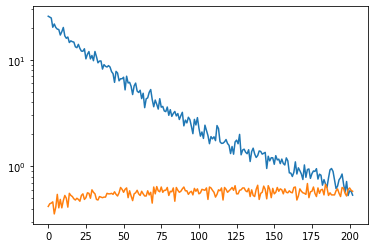

AE -> [Epoch: 1/200000][Batch: 6/196][Loss: 0.5346711874008179][Accuracy: 0.581250011920929]


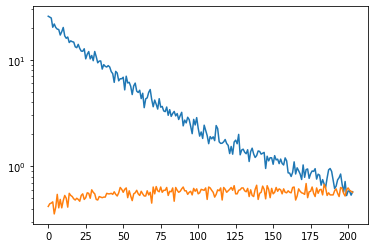

AE -> [Epoch: 1/200000][Batch: 7/196][Loss: 0.5753272175788879][Accuracy: 0.5687500238418579]


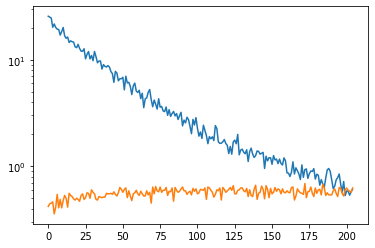

AE -> [Epoch: 1/200000][Batch: 8/196][Loss: 0.6075462698936462][Accuracy: 0.625]


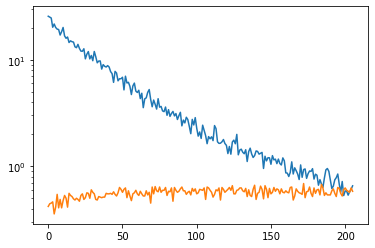

AE -> [Epoch: 1/200000][Batch: 9/196][Loss: 0.6540164351463318][Accuracy: 0.581250011920929]


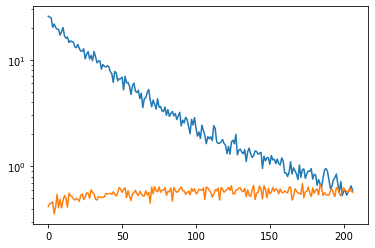

AE -> [Epoch: 1/200000][Batch: 10/196][Loss: 0.5867452025413513][Accuracy: 0.5687500238418579]


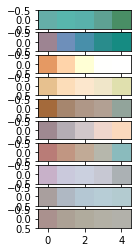

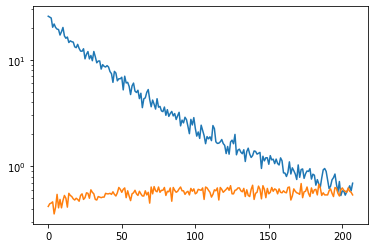

AE -> [Epoch: 1/200000][Batch: 11/196][Loss: 0.6922446489334106][Accuracy: 0.5375000238418579]


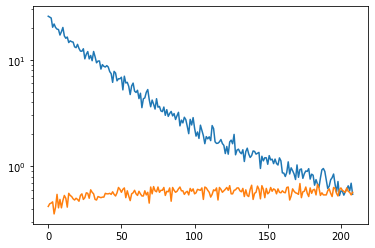

AE -> [Epoch: 1/200000][Batch: 12/196][Loss: 0.5446379780769348][Accuracy: 0.5687500238418579]


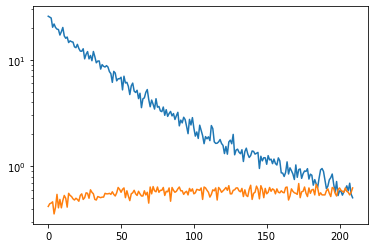

AE -> [Epoch: 1/200000][Batch: 13/196][Loss: 0.5052719116210938][Accuracy: 0.625]


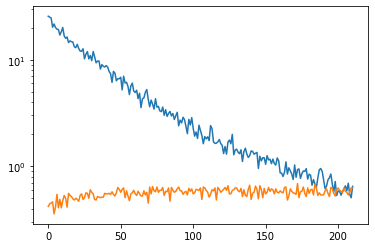

AE -> [Epoch: 1/200000][Batch: 14/196][Loss: 0.646567702293396][Accuracy: 0.625]


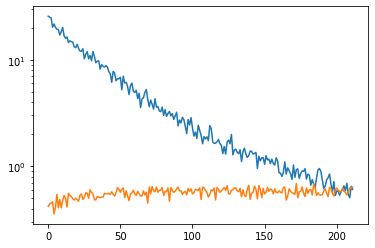

AE -> [Epoch: 1/200000][Batch: 15/196][Loss: 0.6054307222366333][Accuracy: 0.637499988079071]


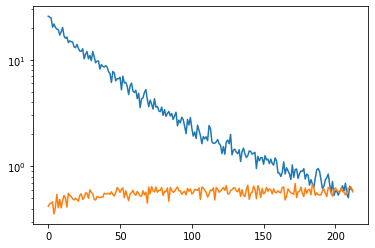

AE -> [Epoch: 1/200000][Batch: 16/196][Loss: 0.5946852564811707][Accuracy: 0.574999988079071]


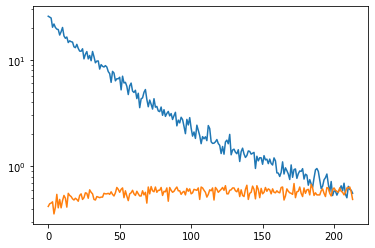

AE -> [Epoch: 1/200000][Batch: 17/196][Loss: 0.5575564503669739][Accuracy: 0.48750001192092896]


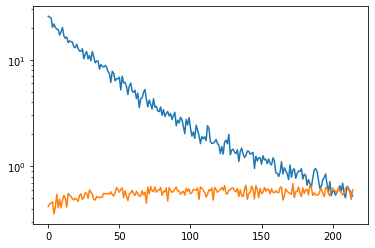

AE -> [Epoch: 1/200000][Batch: 18/196][Loss: 0.525246262550354][Accuracy: 0.6000000238418579]


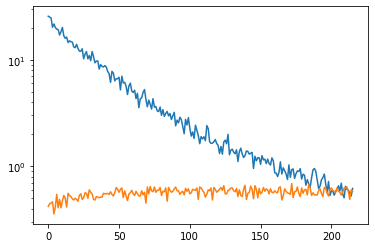

AE -> [Epoch: 1/200000][Batch: 19/196][Loss: 0.6179113984107971][Accuracy: 0.581250011920929]


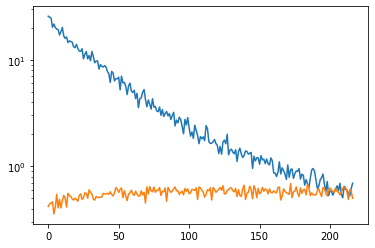

AE -> [Epoch: 1/200000][Batch: 20/196][Loss: 0.692331075668335][Accuracy: 0.5]


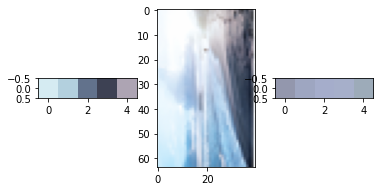

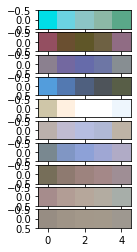

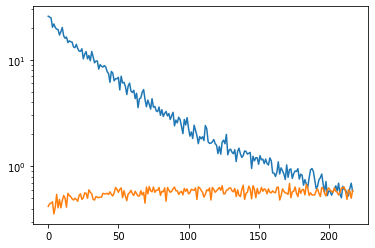

AE -> [Epoch: 1/200000][Batch: 21/196][Loss: 0.5798213481903076][Accuracy: 0.59375]


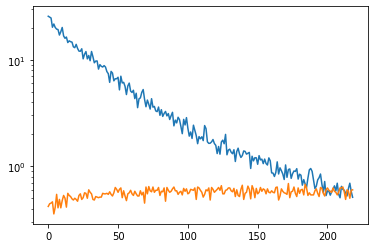

AE -> [Epoch: 1/200000][Batch: 22/196][Loss: 0.5107752680778503][Accuracy: 0.6000000238418579]


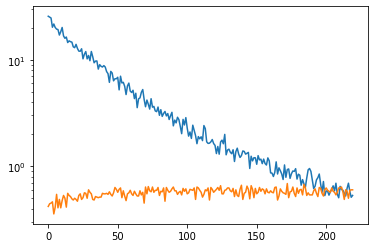

AE -> [Epoch: 1/200000][Batch: 23/196][Loss: 0.5315170288085938][Accuracy: 0.6000000238418579]


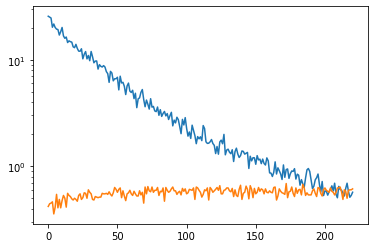

AE -> [Epoch: 1/200000][Batch: 24/196][Loss: 0.5693655610084534][Accuracy: 0.612500011920929]


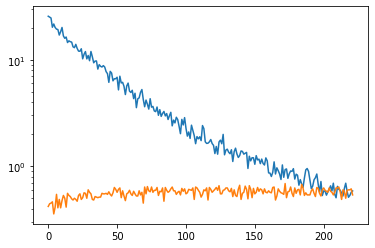

AE -> [Epoch: 1/200000][Batch: 25/196][Loss: 0.5858168601989746][Accuracy: 0.5375000238418579]


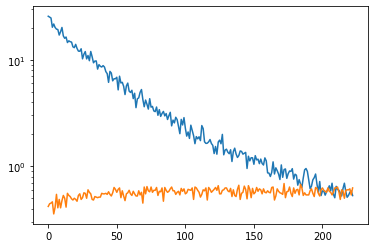

AE -> [Epoch: 1/200000][Batch: 26/196][Loss: 0.5296423435211182][Accuracy: 0.625]


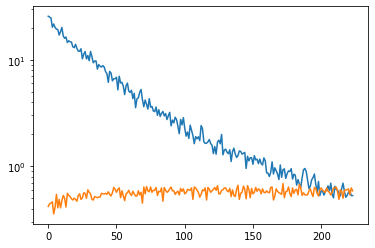

AE -> [Epoch: 1/200000][Batch: 27/196][Loss: 0.5299851894378662][Accuracy: 0.5874999761581421]


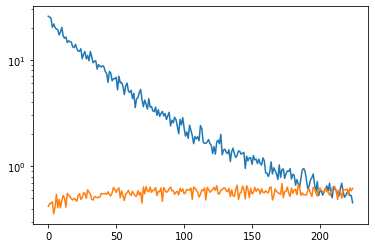

AE -> [Epoch: 1/200000][Batch: 28/196][Loss: 0.45362627506256104][Accuracy: 0.6187499761581421]


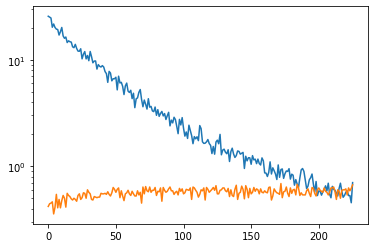

AE -> [Epoch: 1/200000][Batch: 29/196][Loss: 0.7014773488044739][Accuracy: 0.668749988079071]


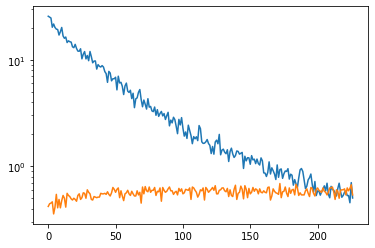

AE -> [Epoch: 1/200000][Batch: 30/196][Loss: 0.5026916265487671][Accuracy: 0.5375000238418579]


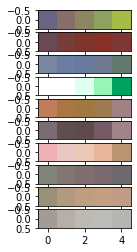

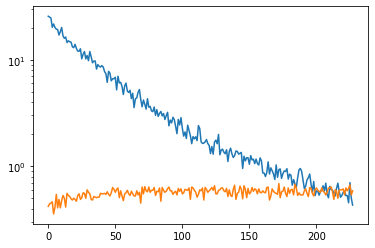

AE -> [Epoch: 1/200000][Batch: 31/196][Loss: 0.4312964081764221][Accuracy: 0.5874999761581421]


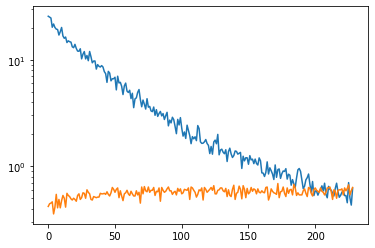

AE -> [Epoch: 1/200000][Batch: 32/196][Loss: 0.6189571619033813][Accuracy: 0.6312500238418579]


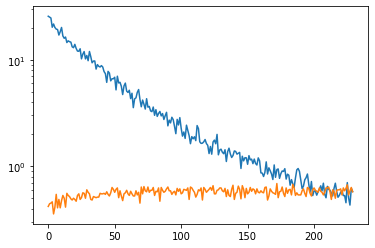

AE -> [Epoch: 1/200000][Batch: 33/196][Loss: 0.57911217212677][Accuracy: 0.574999988079071]


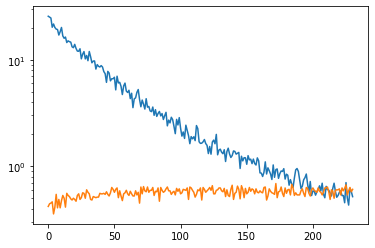

AE -> [Epoch: 1/200000][Batch: 34/196][Loss: 0.5175859928131104][Accuracy: 0.606249988079071]


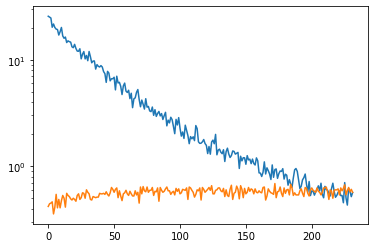

AE -> [Epoch: 1/200000][Batch: 35/196][Loss: 0.5663371682167053][Accuracy: 0.5687500238418579]


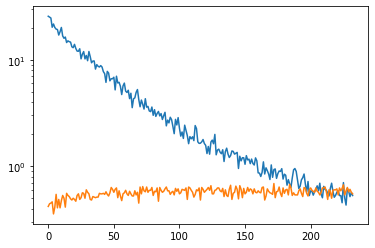

AE -> [Epoch: 1/200000][Batch: 36/196][Loss: 0.530551552772522][Accuracy: 0.550000011920929]


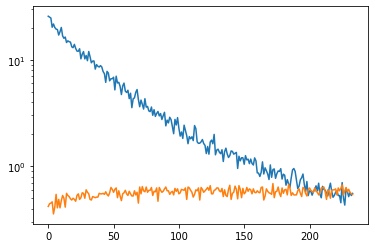

AE -> [Epoch: 1/200000][Batch: 37/196][Loss: 0.5554031133651733][Accuracy: 0.543749988079071]


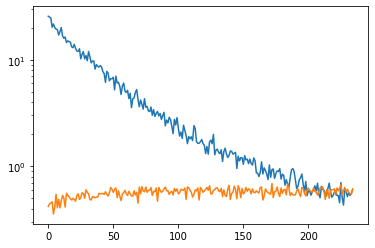

AE -> [Epoch: 1/200000][Batch: 38/196][Loss: 0.5985958576202393][Accuracy: 0.612500011920929]


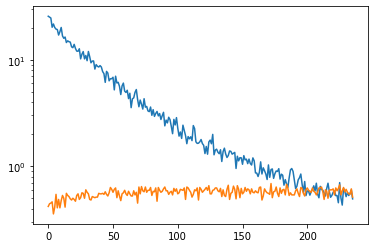

AE -> [Epoch: 1/200000][Batch: 39/196][Loss: 0.49339210987091064][Accuracy: 0.512499988079071]


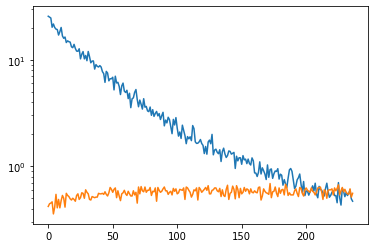

AE -> [Epoch: 1/200000][Batch: 40/196][Loss: 0.46874940395355225][Accuracy: 0.5562499761581421]


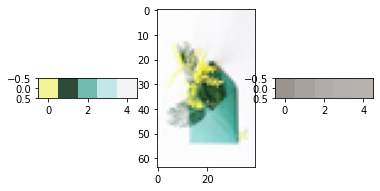

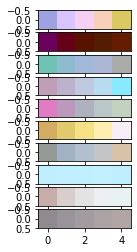

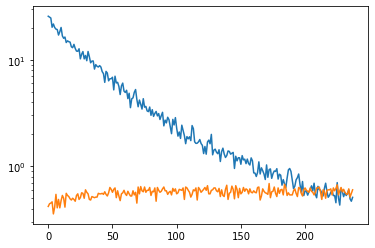

AE -> [Epoch: 1/200000][Batch: 41/196][Loss: 0.5097266435623169][Accuracy: 0.6000000238418579]


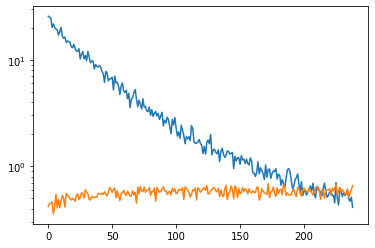

AE -> [Epoch: 1/200000][Batch: 42/196][Loss: 0.4108705520629883][Accuracy: 0.65625]


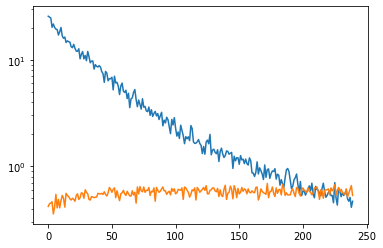

AE -> [Epoch: 1/200000][Batch: 43/196][Loss: 0.46803349256515503][Accuracy: 0.53125]


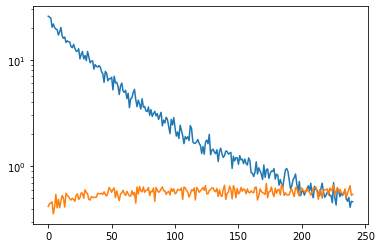

AE -> [Epoch: 1/200000][Batch: 44/196][Loss: 0.4639759361743927][Accuracy: 0.543749988079071]


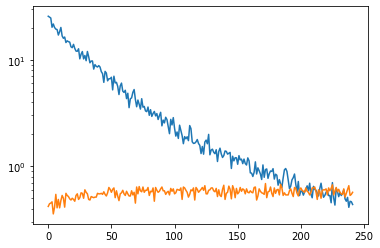

AE -> [Epoch: 1/200000][Batch: 45/196][Loss: 0.4368237257003784][Accuracy: 0.5687500238418579]


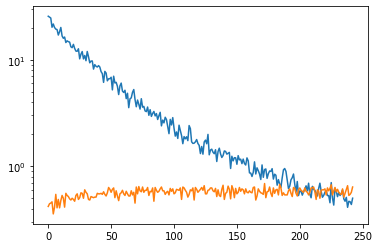

AE -> [Epoch: 1/200000][Batch: 46/196][Loss: 0.5004850029945374][Accuracy: 0.637499988079071]


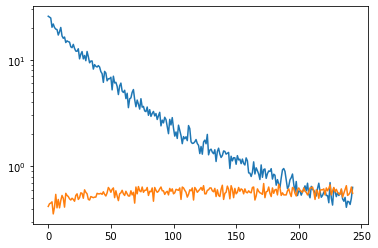

AE -> [Epoch: 1/200000][Batch: 47/196][Loss: 0.6327289938926697][Accuracy: 0.5562499761581421]


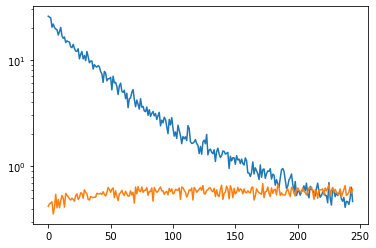

AE -> [Epoch: 1/200000][Batch: 48/196][Loss: 0.46671628952026367][Accuracy: 0.606249988079071]


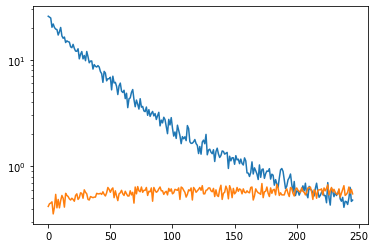

AE -> [Epoch: 1/200000][Batch: 49/196][Loss: 0.48065006732940674][Accuracy: 0.550000011920929]


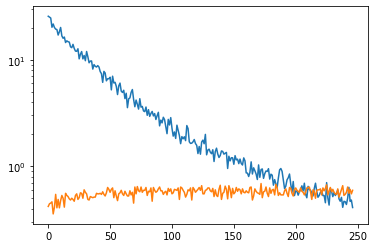

AE -> [Epoch: 1/200000][Batch: 50/196][Loss: 0.40915608406066895][Accuracy: 0.59375]


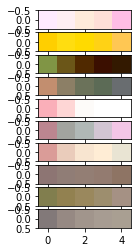

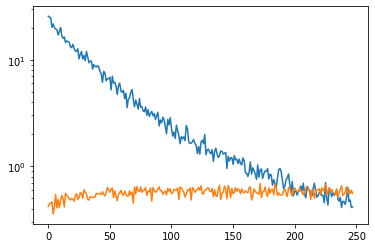

AE -> [Epoch: 1/200000][Batch: 51/196][Loss: 0.4143572449684143][Accuracy: 0.5562499761581421]


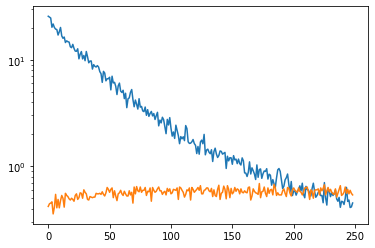

AE -> [Epoch: 1/200000][Batch: 52/196][Loss: 0.4510502815246582][Accuracy: 0.5375000238418579]


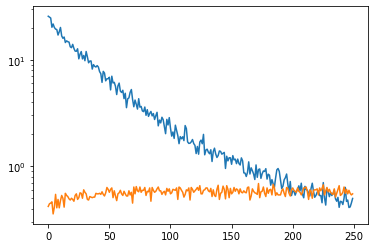

AE -> [Epoch: 1/200000][Batch: 53/196][Loss: 0.4977682828903198][Accuracy: 0.550000011920929]


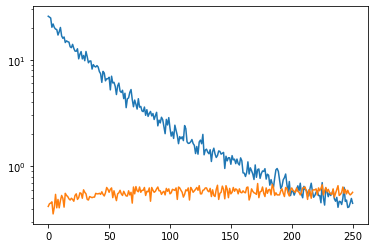

AE -> [Epoch: 1/200000][Batch: 54/196][Loss: 0.4482201635837555][Accuracy: 0.5687500238418579]


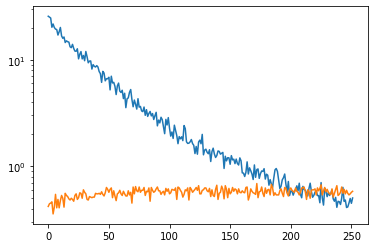

AE -> [Epoch: 1/200000][Batch: 55/196][Loss: 0.5028414726257324][Accuracy: 0.581250011920929]


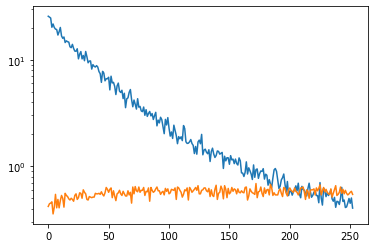

AE -> [Epoch: 1/200000][Batch: 56/196][Loss: 0.4040188193321228][Accuracy: 0.543749988079071]


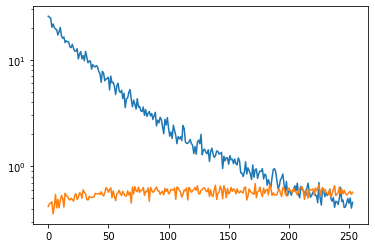

AE -> [Epoch: 1/200000][Batch: 57/196][Loss: 0.45708879828453064][Accuracy: 0.5687500238418579]


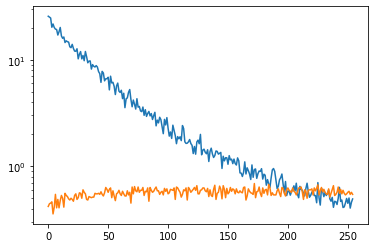

AE -> [Epoch: 1/200000][Batch: 58/196][Loss: 0.4922279119491577][Accuracy: 0.543749988079071]


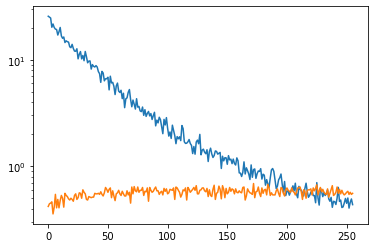

AE -> [Epoch: 1/200000][Batch: 59/196][Loss: 0.4356217384338379][Accuracy: 0.5562499761581421]


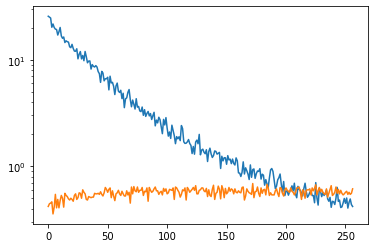

AE -> [Epoch: 1/200000][Batch: 60/196][Loss: 0.418352872133255][Accuracy: 0.612500011920929]


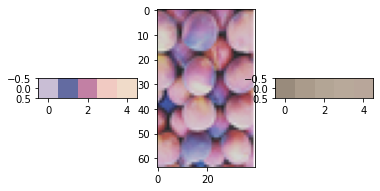

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


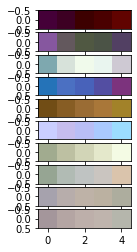

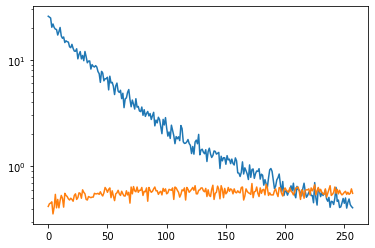

AE -> [Epoch: 1/200000][Batch: 61/196][Loss: 0.40698397159576416][Accuracy: 0.5562499761581421]


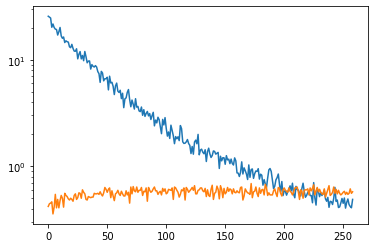

AE -> [Epoch: 1/200000][Batch: 62/196][Loss: 0.4876420497894287][Accuracy: 0.574999988079071]


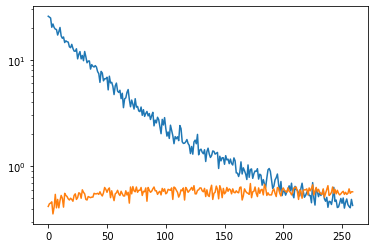

AE -> [Epoch: 1/200000][Batch: 63/196][Loss: 0.42830002307891846][Accuracy: 0.574999988079071]


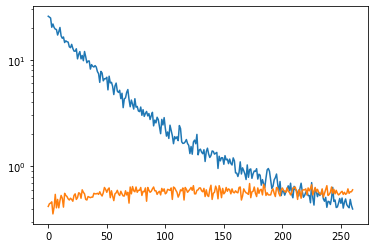

AE -> [Epoch: 1/200000][Batch: 64/196][Loss: 0.3964577317237854][Accuracy: 0.6000000238418579]


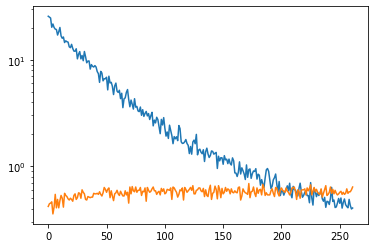

AE -> [Epoch: 1/200000][Batch: 65/196][Loss: 0.4048738479614258][Accuracy: 0.637499988079071]


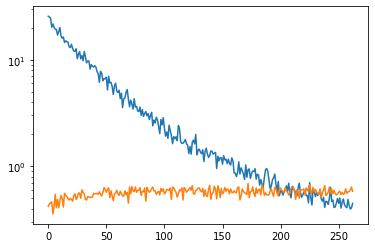

AE -> [Epoch: 1/200000][Batch: 66/196][Loss: 0.4472983777523041][Accuracy: 0.581250011920929]


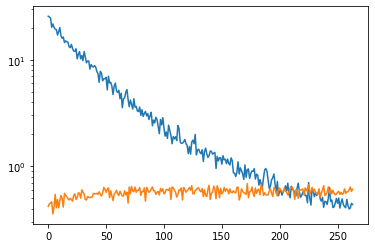

AE -> [Epoch: 1/200000][Batch: 67/196][Loss: 0.4365750849246979][Accuracy: 0.606249988079071]


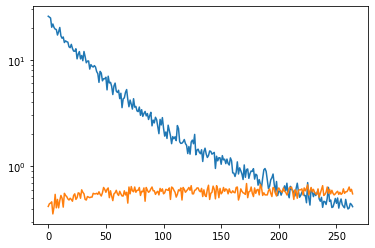

AE -> [Epoch: 1/200000][Batch: 68/196][Loss: 0.416789174079895][Accuracy: 0.550000011920929]


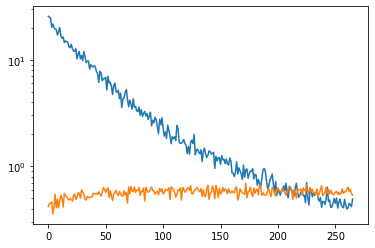

AE -> [Epoch: 1/200000][Batch: 69/196][Loss: 0.49148738384246826][Accuracy: 0.5375000238418579]


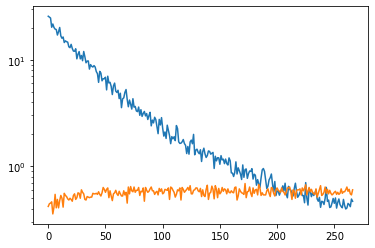

AE -> [Epoch: 1/200000][Batch: 70/196][Loss: 0.468148410320282][Accuracy: 0.6000000238418579]


/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


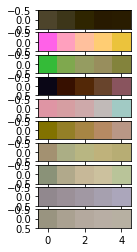

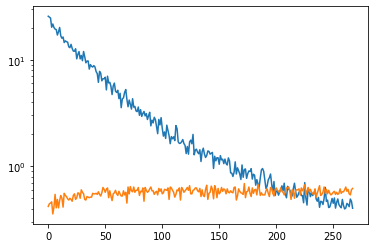

AE -> [Epoch: 1/200000][Batch: 71/196][Loss: 0.40292948484420776][Accuracy: 0.6187499761581421]


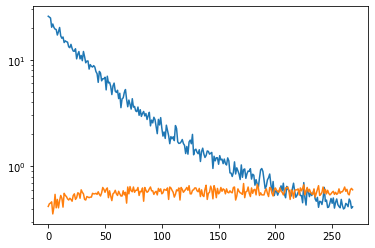

AE -> [Epoch: 1/200000][Batch: 72/196][Loss: 0.41548246145248413][Accuracy: 0.6000000238418579]


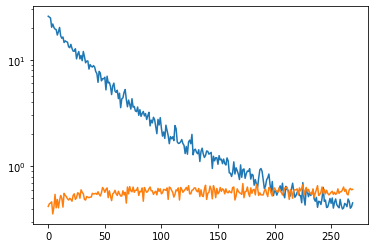

AE -> [Epoch: 1/200000][Batch: 73/196][Loss: 0.45197194814682007][Accuracy: 0.606249988079071]


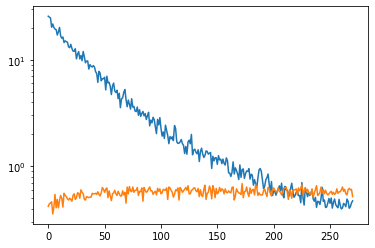

AE -> [Epoch: 1/200000][Batch: 74/196][Loss: 0.4728795886039734][Accuracy: 0.518750011920929]


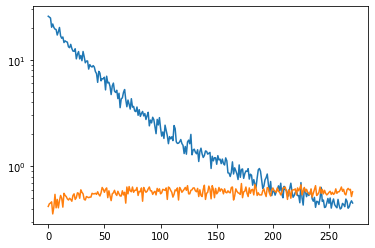

AE -> [Epoch: 1/200000][Batch: 75/196][Loss: 0.4511532187461853][Accuracy: 0.574999988079071]


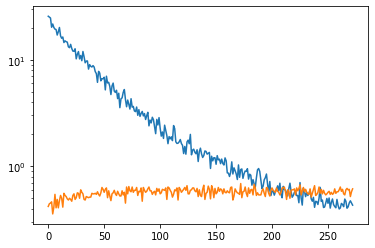

AE -> [Epoch: 1/200000][Batch: 76/196][Loss: 0.4306873679161072][Accuracy: 0.612500011920929]


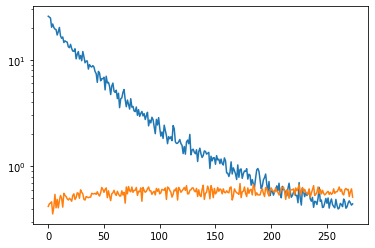

AE -> [Epoch: 1/200000][Batch: 77/196][Loss: 0.4424675703048706][Accuracy: 0.512499988079071]


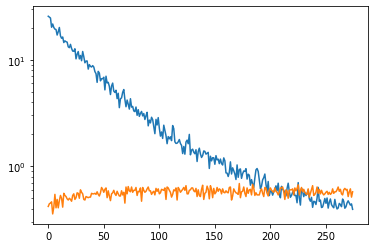

AE -> [Epoch: 1/200000][Batch: 78/196][Loss: 0.39342421293258667][Accuracy: 0.574999988079071]


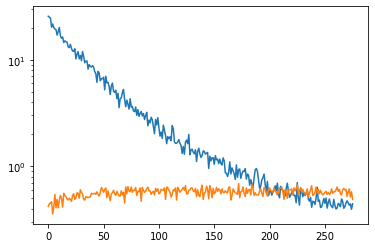

AE -> [Epoch: 1/200000][Batch: 79/196][Loss: 0.4436764121055603][Accuracy: 0.48750001192092896]


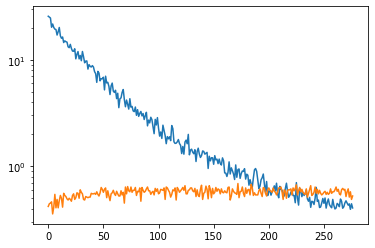

In [ ]:
#tf.config.experimental_run_functions_eagerly(True)
config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth = True
import keras.backend as K


latent_dim_size = 64
latent_dim_div = 16
beta = 16
reconstruction_weight = 150
activation = 'elu'

def sampler(layers):
    std_norm = K.random_normal(shape=(K.shape(layers[0])[0], latent_dim_size), mean=0, stddev=0.5)
    return layers[0] + layers[1] * std_norm


from keras.layers import Input, Flatten, Dense, Lambda, Reshape, Activation, BatchNormalization, Dropout, GaussianNoise
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose, Concatenate
from keras.regularizers import l2
from keras import Model
import keras


def conv2d(layer_input, filters, f_size=4, strides=1, bn=True, avg_pool=0, max_pool=0):
    """Layers used during downsampling"""
    d = keras.layers.Conv2D(filters, kernel_size=f_size, strides=strides, padding='same')(layer_input)
    d = keras.layers.LeakyReLU(alpha=0.2)(d)
    if bn:
        d = keras.layers.BatchNormalization(momentum=0.8)(d)
    if avg_pool:
        d = keras.layers.AveragePooling2D(pool_size=(2, 2))(d)
    if max_pool:
        d = keras.layers.MaxPooling2D(pool_size=(2, 2))(d)
    # d = keras.layers.Dropout(0.1)(d)
    return d


encoder_inp = Input(shape=(64, 40, 3))
'''
drop_in1 = keras.layers.Dropout(0.2)(encoder_inp)
drop_in2 = keras.layers.Dropout(0.2)(encoder_inp)
drop_in3 = keras.layers.Dropout(0.2)(encoder_inp)
drop_in4 = keras.layers.Dropout(0.2)(encoder_inp)
# flattened_inp = Flatten()(encoder_inp)

conv1 = conv2d(encoder_inp, 16, 3, avg_pool=1)
conv1 = conv2d(conv1, 32, 3, avg_pool=1)
conv1 = conv2d(conv1, 64, 3, avg_pool=1)

conv2 = conv2d(encoder_inp, 16, 7, avg_pool=1)
conv2 = conv2d(conv2, 32, 5, avg_pool=1)
conv2 = conv2d(conv2, 64, 5, avg_pool=1)

conv4 = conv2d(encoder_inp, 16, 13, strides=(2, 2))
conv4 = conv2d(conv4, 32, 3, strides=(2, 2))
conv4 = conv2d(conv4, 64, 3, strides=(2, 2))

convcat = keras.layers.Concatenate()([conv1, conv2, conv4])
convcat = conv2d(convcat, 64, 5)
convcat = keras.layers.LeakyReLU(0.2)(convcat)
convcat = keras.layers.AveragePooling2D((2, 2))(convcat)
convcat = conv2d(convcat, 96, 3)
convcat = keras.layers.LeakyReLU(0.2)(convcat)
convcat = keras.layers.AveragePooling2D((2, 2))(convcat)
convcat = Flatten()(convcat)

convcat = Dense(200)(convcat)
convcat = BatchNormalization()(convcat)
convcat = keras.layers.LeakyReLU(0.2)(convcat)
# convcat = keras.layers.Dropout(0.1)(convcat)
'''

conv = conv2d(encoder_inp, 3, 3, avg_pool=0, strides=(2,2))
print(conv.shape)
conv = conv2d(conv, 6, 3, avg_pool=0, strides=(2,2))
print(conv.shape)
conv = conv2d(conv, 12, 3, avg_pool=0, strides=(2,2))
print(conv.shape)
conv = conv2d(conv, 24, 3, avg_pool=0, strides=(2,2))
print(conv.shape)
conv = conv2d(conv, 32, 3, avg_pool=0, strides=(2,2))
print(conv.shape)

convcat = Flatten()(conv)

convcat = Dense(64)(convcat)
convcat = keras.layers.LeakyReLU(0.2)(convcat)

mean_layer = Dense(latent_dim_size, activation=activation)(convcat)
sd_layer = Dense(latent_dim_size, activation=activation)(convcat)
latent_vector = Lambda(sampler)([mean_layer, sd_layer])

encoder = Model(encoder_inp, latent_vector, name="VAE_Encoder")
encoder.summary()

prediction_size = (5, 3)
decoder_inp = Input(shape=(latent_dim_size,))

x = decoder_inp
'''
    LSTM goes here
'''

repeat = keras.layers.RepeatVector(5)(x)

x = keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True, return_state=True), merge_mode='concat')(repeat, initial_state = [x,x])
x = keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True), merge_mode='concat')(x[0], initial_state = [x[1],x[1]])
output = keras.layers.TimeDistributed(keras.layers.Dense(3))(x)

'''
print(x.shape)
x = keras.layers.Bidirectional(keras.layers.GRU(16, return_sequences=True), merge_mode='concat')(x)
print(x.shape)
x = keras.layers.Bidirectional(keras.layers.GRU(12, return_sequences=True), merge_mode='concat')(x)
print(x.shape)
x = keras.layers.Bidirectional(keras.layers.GRU(8, return_sequences=True), merge_mode='concat')(x)
print(x.shape)
x = keras.layers.Bidirectional(keras.layers.GRU(8, return_sequences=True), merge_mode='concat')(x)
print(x.shape)
output = keras.layers.TimeDistributed(keras.layers.Dense(5))(x)
output = keras.layers.TimeDistributed(keras.layers.Dense(3))(x)

'''
decoder = Model(decoder_inp, output, name="VAE_Decoder")
decoder.summary()




autoencoder = Model(encoder_inp, decoder(encoder(encoder_inp)), name="Variational_Auto_Encoder")
autoencoder.summary()

#autoencoder.load_weights("/content/gdrive/My Drive/ColorPalettes/VAE/vae.h5")


def vae_loss(input_img, output):
    #input_img = tensorflow.image.rgb_to_hsv(input_img + 0.5)
    #output = tensorflow.image.rgb_to_hsv(output + 0.5)
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.mean(K.abs((output) - (input_img)))
    # reconstruction_loss = K.print_tensor(reconstruction_loss)
    kl_loss = 1 + sd_layer - K.square(mean_layer) - K.exp(sd_layer)
    kl_loss = -0.5 * K.mean(kl_loss, axis=0)
    kl_loss = K.sum(kl_loss)

    kl_loss = K.abs(kl_loss)
    # kl_loss = K.print_tensor(kl_loss)

    total_loss = K.sum(reconstruction_loss + kl_loss)
    return total_loss


from keras import optimizers


optim = keras.optimizers.Adam(lr=0.0004, beta_1=0.5, beta_2=0.99)
autoencoder.compile(optimizer = optim, loss=vae_loss, metrics=["accuracy"], loss_weights=[1])

import numpy as np
import matplotlib.pyplot as plt


from skimage import color
def denormalize_lab(lab):
    L, a, b = lab[:, :, 0], lab[:, :, 1], lab[:, :, 2]

    L = (L + 1) * 50
    a = a * 128
    b = b * 128

    Lab = np.stack([L, a, b], axis=2)
    return Lab

def show_image(x):
    x = denormalize_lab(x)
    x = color.lab2rgb(x)
    plt.imshow(x)


def visualize_rand(target, img, code1, code2, code3, prediction1, prediction2, prediction3, e, i, j, name):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input

    plt.subplot(3, 3, 1)
    plt.title("Target")
    show_image(target.reshape(1, 5, 3))

    plt.subplot(3, 3, 4)
    plt.title("Image")
    show_image(img)

    plt.subplot(3, 3, 2)
    plt.title("Code")
    plt.imshow(code1.reshape([code3.shape[-1] // latent_dim_div, -1]))

    plt.subplot(3, 3, 3)
    plt.title("Prediction")
    show_image(prediction1.reshape((1, 5, 3)))

    plt.subplot(3, 3, 5)

    plt.imshow(code2.reshape([code2.shape[-1] // latent_dim_div, -1]))

    plt.subplot(3, 3, 6)
    show_image(prediction2.reshape((1, 5, 3)))

    plt.subplot(3, 3, 8)
    plt.imshow(code3.reshape([code3.shape[-1] // latent_dim_div, -1]))

    plt.subplot(3, 3, 9)
    show_image(prediction3.reshape((1, 5, 3)))

    #plt.savefig("/content/gdrive/My Drive/ColorPalettes/imgs/{}_img_{}_{}_{}.png".format(name, str(e).zfill(4), str(i).zfill(4), str(j).zfill(4)))
    plt.show()
    plt.close('all')


epochs = 200000
counter = 0
test_counter = 0

loss_hist = []
accuracy_hist = []

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

start_epoch = 0
#start_epoch = np.load("/content/gdrive/My Drive/ColorPalettes/VAE/start_epoch.npy")[0]
#loss_hist, accuracy_hist = np.load("/content/gdrive/My Drive/ColorPalettes/VAE/loss_hist.npy")

for e in range(start_epoch, epochs):
    if e % 1 == 0:
        autoencoder.save("/content/gdrive/My Drive/ColorPalettes/VAE/vae.h5")

        np.save("/content/gdrive/My Drive/ColorPalettes/VAE/loss_hist", np.array([loss_hist, accuracy_hist]))
        np.save("/content/gdrive/My Drive/ColorPalettes/VAE/start_epoch", np.array([e]))

    for i, (img, colors) in enumerate(train_loader.load_batch()):
        colors = np.squeeze(colors)
        loss = autoencoder.train_on_batch(img, colors)
        loss_hist = np.append(loss_hist, loss[0])
        accuracy_hist = np.append(accuracy_hist, loss[1])

        plt.yscale('log')
        plt.plot(loss_hist)
        plt.plot(accuracy_hist)
        
        plt.show()

        print("AE -> [Epoch: {}/{}][Batch: {}/{}][Loss: {}][Accuracy: {}]".format(e, epochs, i, len(train_loader),
                                                                                  loss[0], loss[1]))
        if e % 1 == 0 and i % 20 == 0:
            plt.subplot(1, 3, 1)
            show_image(colors[0].reshape((1, 5, 3)))
            plt.subplot(1, 3, 2)
            show_image(img[0])
            plt.subplot(1, 3, 3)
            show_image(autoencoder.predict(img)[0].reshape((1, 5, 3)))
            #plt.savefig("/content/gdrive/My Drive/ColorPalettes/imgs/{}_img_{}_{}_{}.png".format("train", str(e).zfill(4), str(i).zfill(4), str(0).zfill(4)))
            plt.show()

        if e % 1 == 0 and i % 500 == 0:
            for j, (test_img, c) in enumerate(test_loader.load_batch()):
                # run encoder on random noise
                random_noise1 = encoder.predict(test_img)
                sampled1 = decoder.predict(random_noise1)

                random_noise2 = encoder.predict(test_img)
                sampled2 = decoder.predict(random_noise2)

                random_noise3 = encoder.predict(test_img)
                sampled3 = decoder.predict(random_noise3)

                validation_loss = autoencoder.test_on_batch(test_img, c[0])
                print("TEST --> [Epoch: {}/{}][Batch: {}/{}][Loss: {}][Accuracy: {}]".format(e, epochs, j,
                                                                                             len(test_loader),
                                                                                             validation_loss[0],
                                                                                             validation_loss[1]))
                visualize_rand(c[0], test_img[0], random_noise1[0], random_noise2[0], random_noise3[0], sampled1[0],
                               sampled2[0], sampled3[0], e, i, 0, "Z")

                if j == 2:
                    break

        if e % 1 == 0 and i % 10 == 0:
            for j in range(10):
                random_noise = np.random.normal(0, 1 - (j) / 10, (1, latent_dim_size))
                plt.subplot(10, 1, j + 1)
                randomly_sampled = decoder.predict(random_noise)
                show_image(randomly_sampled)
            #plt.savefig(
            #    "/content/gdrive/My Drive/ColorPalettes/imgs/{}_img_{}_{}_{}.png".format("Normal", str(e).zfill(4), str(i).zfill(4), 6))
            plt.show()
            plt.close('all')
